# Exploration and Comparison of Transformers for Image Classification

## Few-Shot Linear Probing using Swin Transformer (Swin)

Few-Shot Learning involes showing the model only small number of images per class. For example, showing only 1 image per class makes it a one-shot learning.

For this experiment, **(1, 2, 4, 8, 16)** shots will be used.

### Swin Transformer (Swin)

Swin Transformer model trained on ImageNet-1k at resolution 224x224. It was introduced in the paper *Swin Transformer: Hierarchical Vision Transformer using Shifted Windows by Liu et al.*

https://arxiv.org/abs/2103.14030

### Prerequisites

Load necessary packages.

In [1]:
import os
os.chdir('..')

import torch

import pandas as pd

from datasets import load_dataset

from src.dataset_builder import ImageDataset
from src.models import *
from src.train import *

from utils.config import Config
from utils.train_utils import *
from utils.models_utils import *
from utils.visualization_utils import *
from utils.data_utils import *

Check if there is GPU available.

In [9]:
get_gpu_info()

GPU 0: NVIDIA A100 80GB PCIe MIG 2g.20gb
VRAM: 19.50 GB


Set manual seed for reproducibility.

In [10]:
id = 10
torch.manual_seed(10)

Load Swin image processor used for image pre-processing.

In [11]:
processor = get_backbone_processor(model_names['Swin'])

Print the pre-processing operations done by the processor.

NOTE: Swin uses the same processor as ViT, but has different normalization values (mean and std).

In [12]:
processor

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

### Data Preprocessing

Load each dataset and its splits.

Processor is automatically applied to each image.

#### RESISC45

In [7]:
resisc45 = load_dataset('timm/resisc45')
clean_labels(resisc45, name='resisc45')
resisc45_train = ImageDataset(
    dataset=resisc45['train'],
    processor=processor,
)
resisc45_validation = ImageDataset(
    dataset=resisc45['validation'],
    processor=processor,
)
resisc45_test = ImageDataset(
    dataset=resisc45['test'],
    processor=processor,
)

#### Food-101

In [9]:
food101 = load_dataset('ethz/food101')
clean_labels(food101, name='food101')
food101_train = ImageDataset(
    dataset=food101['train'],
    processor=processor,
)
food101_validation = ImageDataset(
    dataset=food101['validation'],
    processor=processor,
)

#### FER2013

In [11]:
fer2013 = load_dataset('AutumnQiu/fer2013')
clean_labels(fer2013, name='fer2013')
fer2013_train = ImageDataset(
    dataset=fer2013['train'],
    processor=processor,
)
fer2013_validation = ImageDataset(
    dataset=fer2013['valid'],
    processor=processor,
)
fer2013_test = ImageDataset(
    dataset=fer2013['test'],
    processor=processor,
)

#### PCam

In [13]:
pcam = load_dataset('zacharielegault/PatchCamelyon')
clean_labels(pcam, name='pcam')
pcam_train = ImageDataset(
    dataset=pcam['train'],
    processor=processor,
)
pcam_validation = ImageDataset(
    dataset=pcam['validation'],
    processor=processor,
)
pcam_test = ImageDataset(
    dataset=pcam['test'],
    processor=processor,
)

#### SUN397

In [15]:
sun397 = load_dataset('dpdl-benchmark/sun397')
clean_labels(sun397, name='sun397')
sun397_train = ImageDataset(
    dataset=sun397['train'],
    processor=processor,
)
sun397_validation = ImageDataset(
    dataset=sun397['validation'],
    processor=processor,
)
sun397_test = ImageDataset(
    dataset=sun397['test'],
    processor=processor,
)

Resolving data files:   0%|          | 0/28 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/28 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/28 [00:00<?, ?it/s]

#### DTD

In [17]:
dtd = load_dataset('tanganke/dtd')
clean_labels(dtd, name='dtd')
dtd_train = ImageDataset(
    dataset=dtd['train'],
    processor=processor,
)
dtd_test = ImageDataset(
    dataset=dtd['test'],
    processor=processor,
)

### Config

Create a config for experiments and print its settings.

In [2]:
config = Config(
    num_epochs=10, 
    lr=1e-3, 
    weight_decay=0
)
config.get_settings()

{'device': 'cuda',
 'criterion': CrossEntropyLoss(),
 'batch_size': 8,
 'lr': 0.001,
 'num_epochs': 10,
 'optimizer': torch.optim.adam.Adam,
 'weight_decay': 0}

Create empty array to store dataset accuracies for each experiment.

In [19]:
resisc45_accs = []
food101_accs = []
fer2013_accs = []
pcam_accs = []
sun397_accs = []
dtd_accs = []

### Few-Shot Linear Probing (n=1)


Model is shown only 1 image per class from the dataset.

#### RESISC45

In [20]:
swin_resisc45_1 = Backbone(model_names['Swin'], num_classes=len(resisc45_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([45]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([45, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
get_model_params(swin_resisc45_1)

Parameters: 86.79M


In [22]:
resisc45_loss, resisc45_acc, resisc45_per_class_acc = train_model(
    swin_resisc45_1,
    resisc45_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=1
)

100%|██████████| 6/6 [00:01<00:00,  5.23it/s]


Epochs: 1/10 | train_loss: 4.2616 | train_acc: 0.0000


100%|██████████| 6/6 [00:00<00:00,  9.82it/s]


Epochs: 2/10 | train_loss: 3.0519 | train_acc: 0.4444


100%|██████████| 6/6 [00:00<00:00,  9.95it/s]


Epochs: 3/10 | train_loss: 2.1590 | train_acc: 0.8667


100%|██████████| 6/6 [00:00<00:00, 10.04it/s]


Epochs: 4/10 | train_loss: 1.5115 | train_acc: 0.9778


100%|██████████| 6/6 [00:00<00:00, 10.05it/s]


Epochs: 5/10 | train_loss: 0.9633 | train_acc: 1.0000


100%|██████████| 6/6 [00:00<00:00,  9.98it/s]


Epochs: 6/10 | train_loss: 0.7075 | train_acc: 1.0000


100%|██████████| 6/6 [00:00<00:00, 10.08it/s]


Epochs: 7/10 | train_loss: 0.4730 | train_acc: 1.0000


100%|██████████| 6/6 [00:00<00:00, 10.03it/s]


Epochs: 8/10 | train_loss: 0.3311 | train_acc: 1.0000


100%|██████████| 6/6 [00:00<00:00, 10.03it/s]


Epochs: 9/10 | train_loss: 0.2204 | train_acc: 1.0000


100%|██████████| 6/6 [00:00<00:00, 10.13it/s]

Epochs: 10/10 | train_loss: 0.2080 | train_acc: 1.0000


In [23]:
resisc45_loss, resisc45_acc, resisc45_per_class_acc = evaluate_model(
    swin_resisc45_1,
    resisc45_test,
    config
)

100%|██████████| 788/788 [01:21<00:00,  9.66it/s]

test_loss: 2.5535 | test_acc: 0.3397


In [24]:
resisc45_accs.append(resisc45_acc)

In [25]:
get_top_5_accuracies(resisc45_per_class_acc)

[('sea ice', 0.9205298013245033),
 ('circular farmland', 0.8972602739726028),
 ('airplane', 0.834319526627219),
 ('overpass', 0.6466666666666666),
 ('island', 0.6187050359712231)]

In [26]:
get_bottom_5_accuracies(resisc45_per_class_acc)

[('palace', 0.02142857142857143),
 ('medium residential', 0.04081632653061224),
 ('commercial area', 0.04285714285714286),
 ('railway', 0.06428571428571428),
 ('snowberg', 0.07547169811320754)]

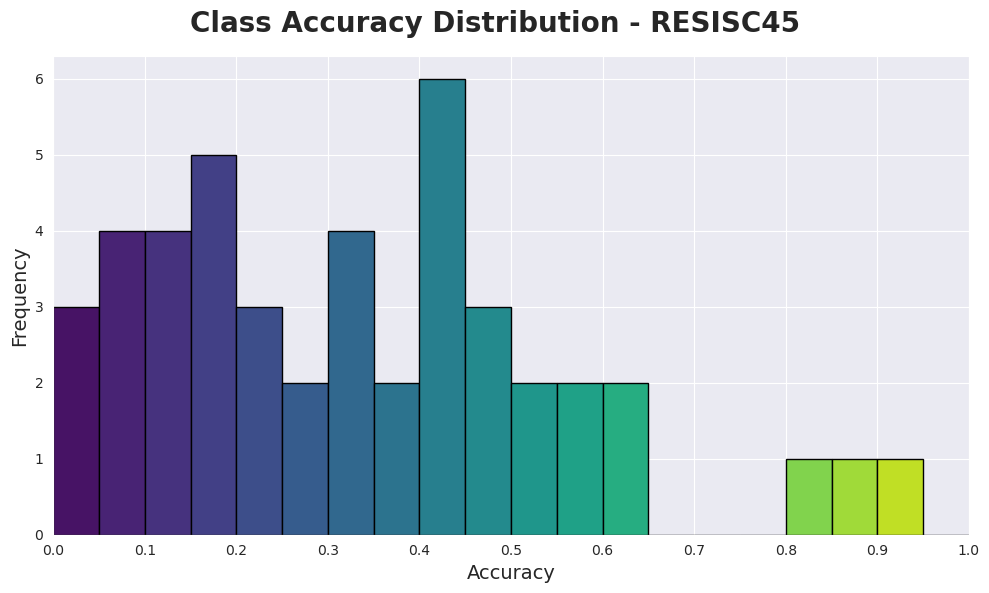

In [27]:
plot_per_class_accuracies(
    resisc45_per_class_acc,
    'RESISC45',
    num_bins=20
)

#### Food-101

In [28]:
swin_food101_1 = Backbone(model_names['Swin'], num_classes=len(food101_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([101]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([101, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
get_model_params(swin_food101_1)

Parameters: 86.85M


In [30]:
food101_loss, food101_acc, food101_per_class_acc = train_model(
    swin_food101_1,
    food101_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=1
)

/opt/conda/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 13/13 [00:02<00:00,  6.21it/s]


Epochs: 1/10 | train_loss: 5.0728 | train_acc: 0.0000


100%|██████████| 13/13 [00:01<00:00,  8.39it/s]


Epochs: 2/10 | train_loss: 3.2558 | train_acc: 0.5644


100%|██████████| 13/13 [00:01<00:00,  8.34it/s]


Epochs: 3/10 | train_loss: 1.9842 | train_acc: 0.9901


100%|██████████| 13/13 [00:01<00:00,  8.37it/s]


Epochs: 4/10 | train_loss: 1.0711 | train_acc: 1.0000


100%|██████████| 13/13 [00:01<00:00,  7.10it/s]


Epochs: 5/10 | train_loss: 0.5482 | train_acc: 1.0000


100%|██████████| 13/13 [00:01<00:00,  8.38it/s]


Epochs: 6/10 | train_loss: 0.3382 | train_acc: 1.0000


100%|██████████| 13/13 [00:01<00:00,  8.41it/s]


Epochs: 7/10 | train_loss: 0.2067 | train_acc: 1.0000


100%|██████████| 13/13 [00:01<00:00,  8.42it/s]


Epochs: 8/10 | train_loss: 0.1632 | train_acc: 1.0000


100%|██████████| 13/13 [00:01<00:00,  8.36it/s]


Epochs: 9/10 | train_loss: 0.1277 | train_acc: 1.0000


100%|██████████| 13/13 [00:01<00:00,  8.36it/s]

Epochs: 10/10 | train_loss: 0.1152 | train_acc: 1.0000


In [31]:
food101_loss, food101_acc, food101_per_class_acc = evaluate_model(
    swin_food101_1,
    food101_validation,
    config
)

100%|██████████| 3157/3157 [06:24<00:00,  8.20it/s]


test_loss: 2.7170 | test_acc: 0.3966


In [32]:
food101_accs.append(food101_acc)

In [33]:
get_top_5_accuracies(food101_per_class_acc)

[('spaghetti carbonara', 0.988),
 ('guacamole', 0.984),
 ('pizza', 0.984),
 ('edamame', 0.976),
 ('cup cakes', 0.916)]

In [34]:
get_bottom_5_accuracies(food101_per_class_acc)

[('dumplings', 0.0),
 ('panna cotta', 0.0),
 ('scallops', 0.0),
 ('waffles', 0.0),
 ('chocolate mousse', 0.004)]

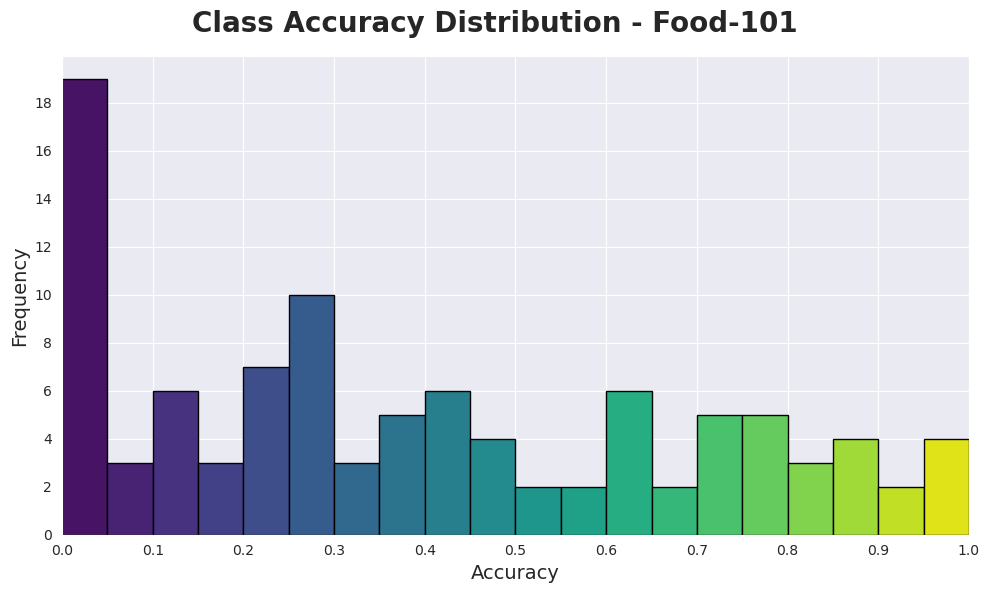

In [35]:
plot_per_class_accuracies(
    food101_per_class_acc,
    'Food-101',
    num_bins=20
)

#### FER2013

In [36]:
swin_fer2013_1 = Backbone(model_names['Swin'], num_classes=len(fer2013_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([7]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([7, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
get_model_params(swin_fer2013_1)

Parameters: 86.75M


In [38]:
fer2013_loss, fer2013_acc, fer2013_per_class_acc = train_model(
    swin_fer2013_1,
    fer2013_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=1
)

100%|██████████| 1/1 [00:00<00:00, 10.92it/s]


Epochs: 1/10 | train_loss: 1.9494 | train_acc: 0.4286


100%|██████████| 1/1 [00:00<00:00, 11.25it/s]


Epochs: 2/10 | train_loss: 1.6012 | train_acc: 0.7143


100%|██████████| 1/1 [00:00<00:00, 11.27it/s]


Epochs: 3/10 | train_loss: 1.3333 | train_acc: 0.8571


100%|██████████| 1/1 [00:00<00:00, 11.31it/s]


Epochs: 4/10 | train_loss: 1.0743 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 10.76it/s]


Epochs: 5/10 | train_loss: 0.9396 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 11.31it/s]


Epochs: 6/10 | train_loss: 0.8559 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 10.65it/s]


Epochs: 7/10 | train_loss: 0.5499 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 11.16it/s]


Epochs: 8/10 | train_loss: 0.4034 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 11.30it/s]


Epochs: 9/10 | train_loss: 0.3251 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 11.31it/s]

Epochs: 10/10 | train_loss: 0.2701 | train_acc: 1.0000


In [39]:
fer2013_loss, fer2013_acc, fer2013_per_class_acc = evaluate_model(
    swin_fer2013_1,
    fer2013_test,
    config
)

100%|██████████| 449/449 [00:43<00:00, 10.30it/s]

test_loss: 1.8793 | test_acc: 0.2764


In [40]:
fer2013_accs.append(fer2013_acc)

In [41]:
fer2013_per_class_acc

{'angry': 0.18126272912423624,
 'disgust': 0.2,
 'fear': 0.39204545454545453,
 'happy': 0.48350398179749715,
 'sad': 0.11784511784511785,
 'surprise': 0.04807692307692308,
 'neutral': 0.2715654952076677}

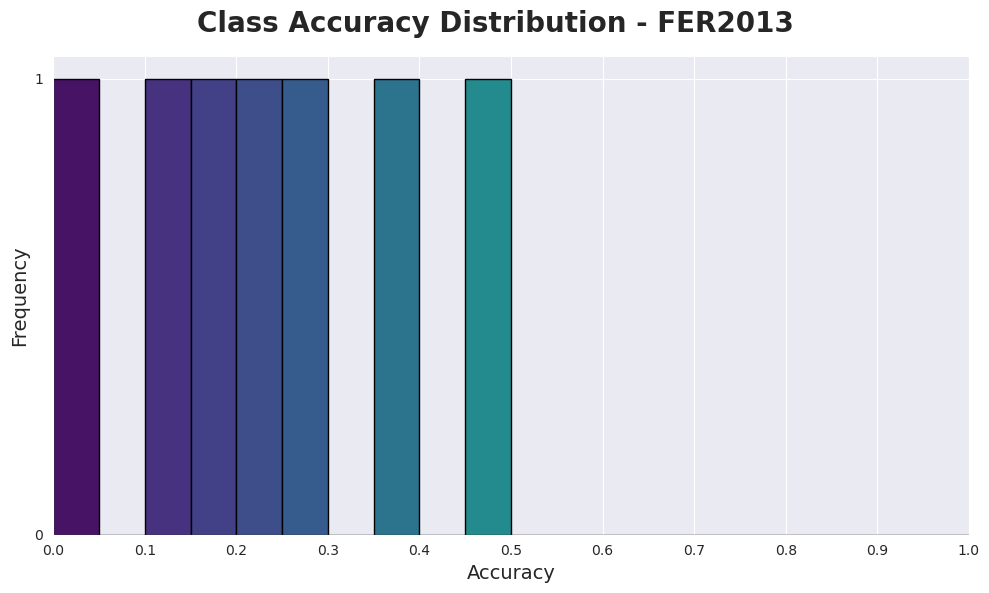

In [42]:
plot_per_class_accuracies(
    fer2013_per_class_acc,
    'FER2013',
    num_bins=20
)

#### PCam

In [43]:
swin_pcam_1 = Backbone(model_names['Swin'], num_classes=len(pcam_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([2, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [44]:
get_model_params(swin_pcam_1)

Parameters: 86.75M


In [45]:
pcam_loss, pcam_acc, pcam_per_class_acc = train_model(
    swin_pcam_1,
    pcam_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=1
)

100%|██████████| 1/1 [00:00<00:00, 31.18it/s]


Epochs: 1/10 | train_loss: 0.6322 | train_acc: 0.5000


100%|██████████| 1/1 [00:00<00:00, 33.01it/s]


Epochs: 2/10 | train_loss: 0.5067 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 23.81it/s]


Epochs: 3/10 | train_loss: 0.4161 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 32.61it/s]


Epochs: 4/10 | train_loss: 0.4342 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 33.04it/s]


Epochs: 5/10 | train_loss: 0.3102 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 25.54it/s]


Epochs: 6/10 | train_loss: 0.2522 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 33.02it/s]


Epochs: 7/10 | train_loss: 0.2057 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 33.04it/s]


Epochs: 8/10 | train_loss: 0.1474 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 28.30it/s]


Epochs: 9/10 | train_loss: 0.2115 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 32.85it/s]

Epochs: 10/10 | train_loss: 0.0925 | train_acc: 1.0000


In [46]:
pcam_loss, pcam_acc, pcam_per_class_acc = evaluate_model(
    swin_pcam_1,
    pcam_test,
    config
)

100%|██████████| 4096/4096 [06:40<00:00, 10.22it/s]

test_loss: 0.8303 | test_acc: 0.4668


In [47]:
pcam_accs.append(pcam_acc)

In [48]:
pcam_per_class_acc

{'healthy lymph node tissue': 0.35647611494112624,
 'lymph node tumor tissue': 0.5772119435794102}

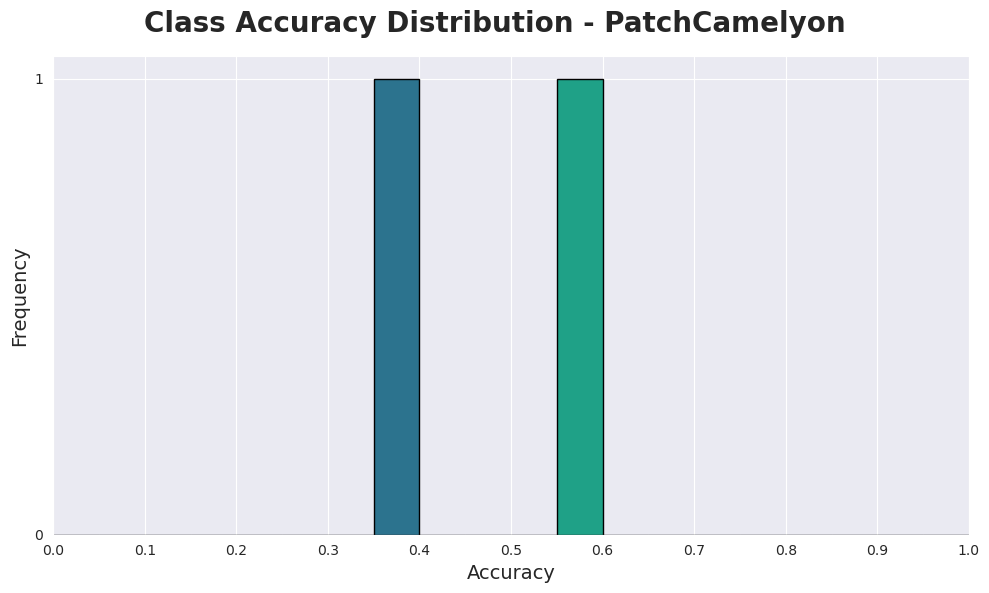

In [49]:
plot_per_class_accuracies(
    pcam_per_class_acc,
    'PatchCamelyon',
    num_bins=20
)

#### SUN397

In [50]:
swin_sun397_1 = Backbone(model_names['Swin'], num_classes=len(sun397_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([397]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([397, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [51]:
get_model_params(swin_sun397_1)

Parameters: 87.15M


In [52]:
sun397_loss, sun397_acc, sun397_per_class_acc = train_model(
    swin_sun397_1,
    sun397_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=1
)

100%|██████████| 50/50 [00:06<00:00,  7.84it/s]


Epochs: 1/10 | train_loss: 6.6944 | train_acc: 0.0000


100%|██████████| 50/50 [00:06<00:00,  8.12it/s]


Epochs: 2/10 | train_loss: 3.5575 | train_acc: 0.7431


100%|██████████| 50/50 [00:06<00:00,  8.14it/s]


Epochs: 3/10 | train_loss: 1.3219 | train_acc: 0.9874


100%|██████████| 50/50 [00:06<00:00,  8.15it/s]


Epochs: 4/10 | train_loss: 0.4306 | train_acc: 0.9975


100%|██████████| 50/50 [00:06<00:00,  8.11it/s]


Epochs: 5/10 | train_loss: 0.2020 | train_acc: 0.9975


100%|██████████| 50/50 [00:06<00:00,  8.13it/s]


Epochs: 6/10 | train_loss: 0.1254 | train_acc: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.71it/s]


Epochs: 7/10 | train_loss: 0.0915 | train_acc: 1.0000


100%|██████████| 50/50 [00:06<00:00,  8.15it/s]


Epochs: 8/10 | train_loss: 0.0761 | train_acc: 1.0000


100%|██████████| 50/50 [00:06<00:00,  8.13it/s]


Epochs: 9/10 | train_loss: 0.0519 | train_acc: 1.0000


100%|██████████| 50/50 [00:06<00:00,  8.16it/s]

Epochs: 10/10 | train_loss: 0.0399 | train_acc: 1.0000


In [53]:
sun397_loss, sun397_acc, sun397_per_class_acc = evaluate_model(
    swin_sun397_1,
    sun397_test,
    config
)

100%|██████████| 2719/2719 [05:36<00:00,  8.07it/s]


test_loss: 2.8911 | test_acc: 0.4068


In [54]:
sun397_accs.append(sun397_acc)

In [55]:
get_top_5_accuracies(sun397_per_class_acc)

[('arrival gate (outdoor)', 1.0),
 ('batters box', 1.0),
 ('raft', 1.0),
 ('sauna', 1.0),
 ('shower', 1.0)]

In [56]:
get_bottom_5_accuracies(sun397_per_class_acc)

[('abbey', 0.0),
 ('archive', 0.0),
 ('art school', 0.0),
 ('ball pit', 0.0),
 ('building facade', 0.0)]

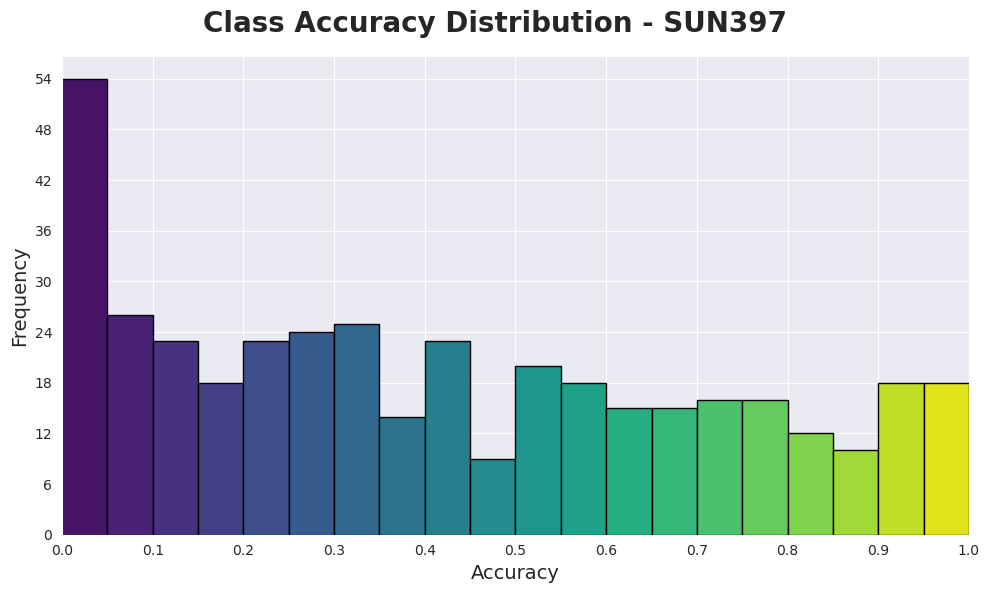

In [57]:
plot_per_class_accuracies(
    sun397_per_class_acc,
    'SUN397',
    num_bins=20
)

#### DTD

In [58]:
swin_dtd_1 = Backbone(model_names['Swin'], num_classes=len(dtd_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([47]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([47, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [59]:
get_model_params(swin_dtd_1)

Parameters: 86.79M


In [60]:
dtd_loss, dtd_acc, dtd_per_class_acc = train_model(
    swin_dtd_1,
    dtd_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=1
)

100%|██████████| 6/6 [00:00<00:00,  7.95it/s]


Epochs: 1/10 | train_loss: 3.9143 | train_acc: 0.0000


100%|██████████| 6/6 [00:00<00:00,  7.88it/s]


Epochs: 2/10 | train_loss: 2.7548 | train_acc: 0.6809


100%|██████████| 6/6 [00:00<00:00,  7.96it/s]


Epochs: 3/10 | train_loss: 1.8318 | train_acc: 0.9787


100%|██████████| 6/6 [00:00<00:00,  7.94it/s]


Epochs: 4/10 | train_loss: 1.1432 | train_acc: 1.0000


100%|██████████| 6/6 [00:00<00:00,  7.93it/s]


Epochs: 5/10 | train_loss: 0.6944 | train_acc: 1.0000


100%|██████████| 6/6 [00:00<00:00,  7.89it/s]


Epochs: 6/10 | train_loss: 0.3713 | train_acc: 1.0000


100%|██████████| 6/6 [00:00<00:00,  7.95it/s]


Epochs: 7/10 | train_loss: 0.2552 | train_acc: 1.0000


100%|██████████| 6/6 [00:00<00:00,  7.94it/s]


Epochs: 8/10 | train_loss: 0.1638 | train_acc: 1.0000


100%|██████████| 6/6 [00:00<00:00,  7.97it/s]


Epochs: 9/10 | train_loss: 0.1083 | train_acc: 1.0000


100%|██████████| 6/6 [00:00<00:00,  7.94it/s]

Epochs: 10/10 | train_loss: 0.1080 | train_acc: 1.0000


In [61]:
dtd_loss, dtd_acc, dtd_per_class_acc = evaluate_model(
    swin_dtd_1,
    dtd_test,
    config
)

100%|██████████| 235/235 [00:28<00:00,  8.16it/s]

test_loss: 2.8609 | test_acc: 0.3734


In [62]:
dtd_accs.append(dtd_acc)

In [63]:
get_top_5_accuracies(dtd_per_class_acc)

[('cobwebbed', 0.925),
 ('lacelike', 0.925),
 ('honeycombed', 0.875),
 ('paisley', 0.85),
 ('freckled', 0.65)]

In [64]:
get_bottom_5_accuracies(dtd_per_class_acc)

[('fibrous', 0.0),
 ('grooved', 0.0),
 ('waffled', 0.0),
 ('smeared', 0.025),
 ('zigzagged', 0.05)]

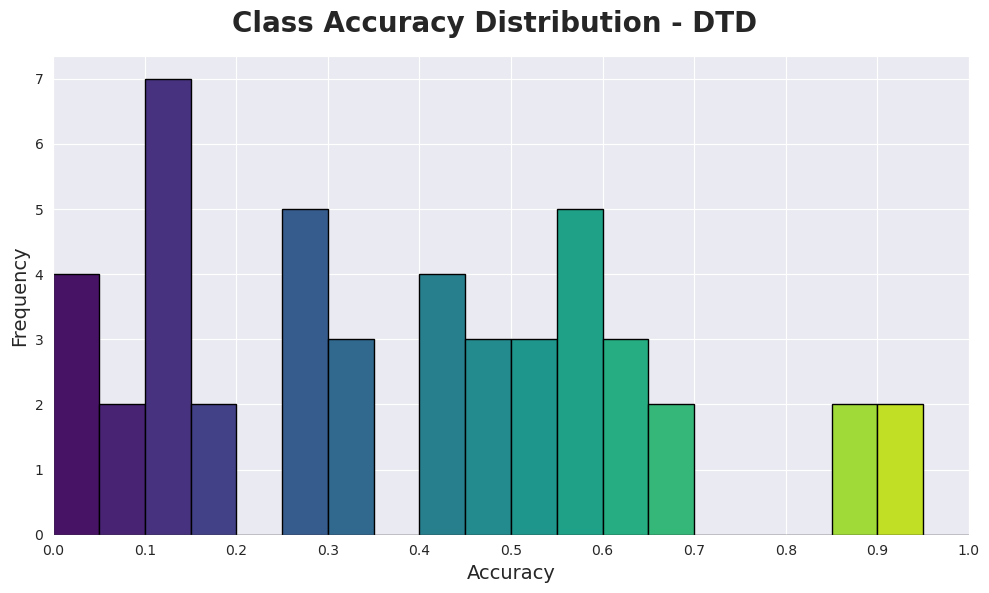

In [65]:
plot_per_class_accuracies(
    dtd_per_class_acc,
    'DTD',
    num_bins=20
)

### Few-Shot Linear Probing (n=2)


Model is shown only 2 images per class from the dataset.

#### RESISC45

In [66]:
swin_resisc45_2 = Backbone(model_names['Swin'], num_classes=len(resisc45_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([45]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([45, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [67]:
get_model_params(swin_resisc45_2)

Parameters: 86.79M


In [68]:
resisc45_loss, resisc45_acc, resisc45_per_class_acc = train_model(
    swin_resisc45_2,
    resisc45_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=2
)

100%|██████████| 12/12 [00:01<00:00, 10.13it/s]


Epochs: 1/10 | train_loss: 4.1720 | train_acc: 0.0333


100%|██████████| 12/12 [00:01<00:00, 10.13it/s]


Epochs: 2/10 | train_loss: 2.7076 | train_acc: 0.5778


100%|██████████| 12/12 [00:01<00:00, 10.14it/s]


Epochs: 3/10 | train_loss: 1.7769 | train_acc: 0.9222


100%|██████████| 12/12 [00:01<00:00, 10.08it/s]


Epochs: 4/10 | train_loss: 1.1563 | train_acc: 0.9556


100%|██████████| 12/12 [00:01<00:00, 10.11it/s]


Epochs: 5/10 | train_loss: 0.8093 | train_acc: 0.9778


100%|██████████| 12/12 [00:01<00:00, 10.15it/s]


Epochs: 6/10 | train_loss: 0.5415 | train_acc: 1.0000


100%|██████████| 12/12 [00:01<00:00, 10.08it/s]


Epochs: 7/10 | train_loss: 0.3846 | train_acc: 0.9889


100%|██████████| 12/12 [00:01<00:00, 10.05it/s]


Epochs: 8/10 | train_loss: 0.3257 | train_acc: 1.0000


100%|██████████| 12/12 [00:01<00:00, 10.14it/s]


Epochs: 9/10 | train_loss: 0.2727 | train_acc: 0.9889


100%|██████████| 12/12 [00:01<00:00, 10.16it/s]

Epochs: 10/10 | train_loss: 0.2527 | train_acc: 1.0000


In [69]:
resisc45_loss, resisc45_acc, resisc45_per_class_acc = evaluate_model(
    swin_resisc45_2,
    resisc45_test,
    config
)

100%|██████████| 788/788 [01:21<00:00,  9.61it/s]

test_loss: 1.9691 | test_acc: 0.4817


In [70]:
resisc45_accs.append(resisc45_acc)

In [72]:
get_top_5_accuracies(resisc45_per_class_acc)

[('sea ice', 0.9602649006622517),
 ('overpass', 0.8866666666666667),
 ('intersection', 0.8769230769230769),
 ('airplane', 0.863905325443787),
 ('circular farmland', 0.7808219178082192)]

In [73]:
get_bottom_5_accuracies(resisc45_per_class_acc)

[('basketball court', 0.1044776119402985),
 ('church', 0.11888111888111888),
 ('dense residential', 0.1388888888888889),
 ('tennis court', 0.14583333333333334),
 ('baseball diamond', 0.18699186991869918)]

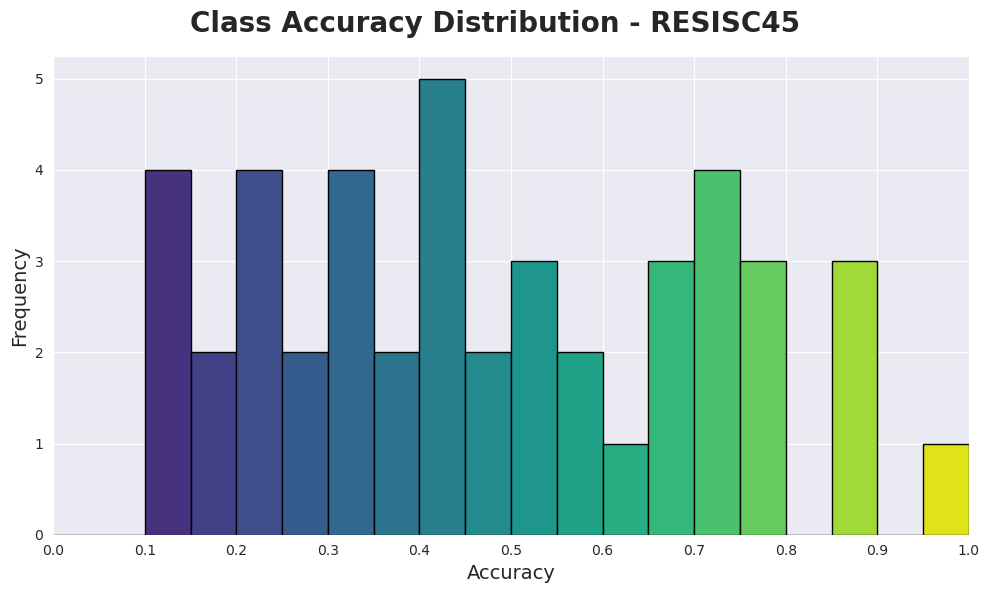

In [74]:
plot_per_class_accuracies(
    resisc45_per_class_acc,
    'RESISC45',
    num_bins=20
)

#### Food-101

In [75]:
swin_food101_2 = Backbone(model_names['Swin'], num_classes=len(food101_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([101]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([101, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [76]:
get_model_params(swin_food101_2)

Parameters: 86.85M


In [77]:
food101_loss, food101_acc, food101_per_class_acc = train_model(
    swin_food101_2,
    food101_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=2
)

/opt/conda/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 26/26 [00:03<00:00,  8.29it/s]


Epochs: 1/10 | train_loss: 4.9735 | train_acc: 0.0198


100%|██████████| 26/26 [00:03<00:00,  8.43it/s]


Epochs: 2/10 | train_loss: 2.8377 | train_acc: 0.6733


100%|██████████| 26/26 [00:03<00:00,  8.38it/s]


Epochs: 3/10 | train_loss: 1.4473 | train_acc: 0.9851


100%|██████████| 26/26 [00:03<00:00,  8.40it/s]


Epochs: 4/10 | train_loss: 0.7007 | train_acc: 0.9950


100%|██████████| 26/26 [00:03<00:00,  8.35it/s]


Epochs: 5/10 | train_loss: 0.4166 | train_acc: 0.9901


100%|██████████| 26/26 [00:03<00:00,  8.37it/s]


Epochs: 6/10 | train_loss: 0.3072 | train_acc: 0.9901


100%|██████████| 26/26 [00:03<00:00,  8.39it/s]


Epochs: 7/10 | train_loss: 0.1840 | train_acc: 1.0000


100%|██████████| 26/26 [00:03<00:00,  8.40it/s]


Epochs: 8/10 | train_loss: 0.1407 | train_acc: 1.0000


100%|██████████| 26/26 [00:03<00:00,  8.42it/s]


Epochs: 9/10 | train_loss: 0.1239 | train_acc: 1.0000


100%|██████████| 26/26 [00:03<00:00,  8.43it/s]

Epochs: 10/10 | train_loss: 0.0956 | train_acc: 1.0000


In [78]:
food101_loss, food101_acc, food101_per_class_acc = evaluate_model(
    swin_food101_2,
    food101_validation,
    config
)

100%|██████████| 3157/3157 [06:19<00:00,  8.33it/s]


test_loss: 1.9194 | test_acc: 0.5443


In [79]:
food101_accs.append(food101_acc)

In [80]:
get_top_5_accuracies(food101_per_class_acc)

[('guacamole', 0.984),
 ('pizza', 0.984),
 ('spaghetti carbonara', 0.98),
 ('edamame', 0.968),
 ('hot dog', 0.968)]

In [81]:
get_bottom_5_accuracies(food101_per_class_acc)

[('panna cotta', 0.016),
 ('waffles', 0.016),
 ('carrot cake', 0.044),
 ('sushi', 0.06),
 ('nachos', 0.116)]

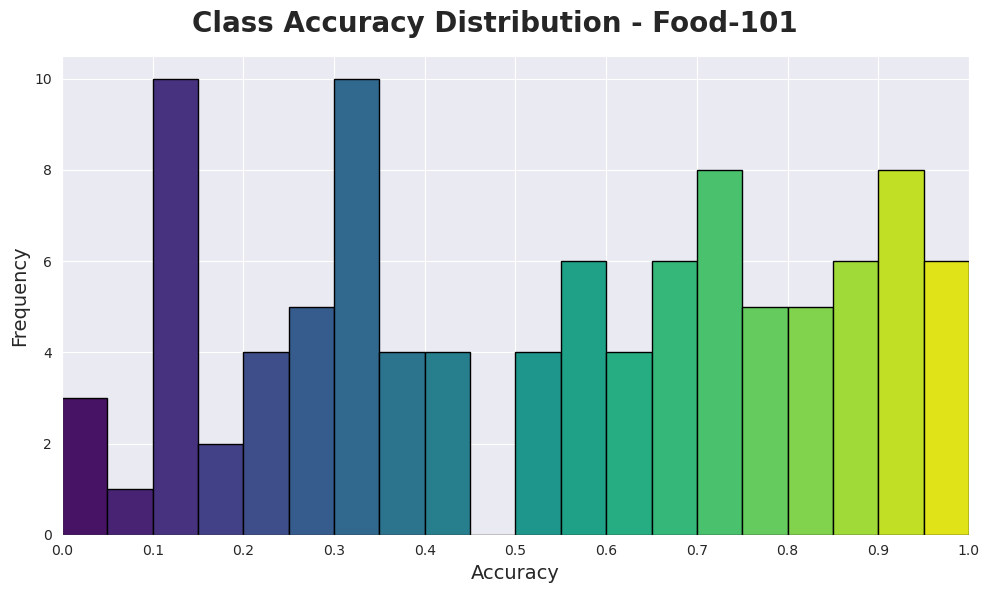

In [82]:
plot_per_class_accuracies(
    food101_per_class_acc,
    'Food-101',
    num_bins=20
)

#### FER2013

In [83]:
swin_fer2013_2 = Backbone(model_names['Swin'], num_classes=len(fer2013_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([7]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([7, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [84]:
get_model_params(swin_fer2013_2)

Parameters: 86.75M


In [85]:
fer2013_loss, fer2013_acc, fer2013_per_class_acc = train_model(
    swin_fer2013_2,
    fer2013_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=2
)

100%|██████████| 2/2 [00:00<00:00, 11.09it/s]


Epochs: 1/10 | train_loss: 2.0439 | train_acc: 0.2143


100%|██████████| 2/2 [00:00<00:00, 11.25it/s]


Epochs: 2/10 | train_loss: 1.6834 | train_acc: 0.5000


100%|██████████| 2/2 [00:00<00:00, 10.93it/s]


Epochs: 3/10 | train_loss: 1.3100 | train_acc: 0.7143


100%|██████████| 2/2 [00:00<00:00, 10.97it/s]


Epochs: 4/10 | train_loss: 1.2116 | train_acc: 0.7857


100%|██████████| 2/2 [00:00<00:00, 11.36it/s]


Epochs: 5/10 | train_loss: 1.0247 | train_acc: 0.7857


100%|██████████| 2/2 [00:00<00:00, 11.39it/s]


Epochs: 6/10 | train_loss: 0.8422 | train_acc: 0.8571


100%|██████████| 2/2 [00:00<00:00, 11.35it/s]


Epochs: 7/10 | train_loss: 0.6936 | train_acc: 1.0000


100%|██████████| 2/2 [00:00<00:00, 11.38it/s]


Epochs: 8/10 | train_loss: 0.5762 | train_acc: 1.0000


100%|██████████| 2/2 [00:00<00:00, 10.80it/s]


Epochs: 9/10 | train_loss: 0.4855 | train_acc: 1.0000


100%|██████████| 2/2 [00:00<00:00, 11.30it/s]

Epochs: 10/10 | train_loss: 0.4010 | train_acc: 1.0000


In [86]:
fer2013_loss, fer2013_acc, fer2013_per_class_acc = evaluate_model(
    swin_fer2013_2,
    fer2013_test,
    config
)

100%|██████████| 449/449 [00:43<00:00, 10.32it/s]

test_loss: 1.9020 | test_acc: 0.2502


In [87]:
fer2013_accs.append(fer2013_acc)

In [88]:
fer2013_per_class_acc

{'angry': 0.15478615071283094,
 'disgust': 0.2,
 'fear': 0.13446969696969696,
 'happy': 0.3583617747440273,
 'sad': 0.4225589225589226,
 'surprise': 0.1778846153846154,
 'neutral': 0.1597444089456869}

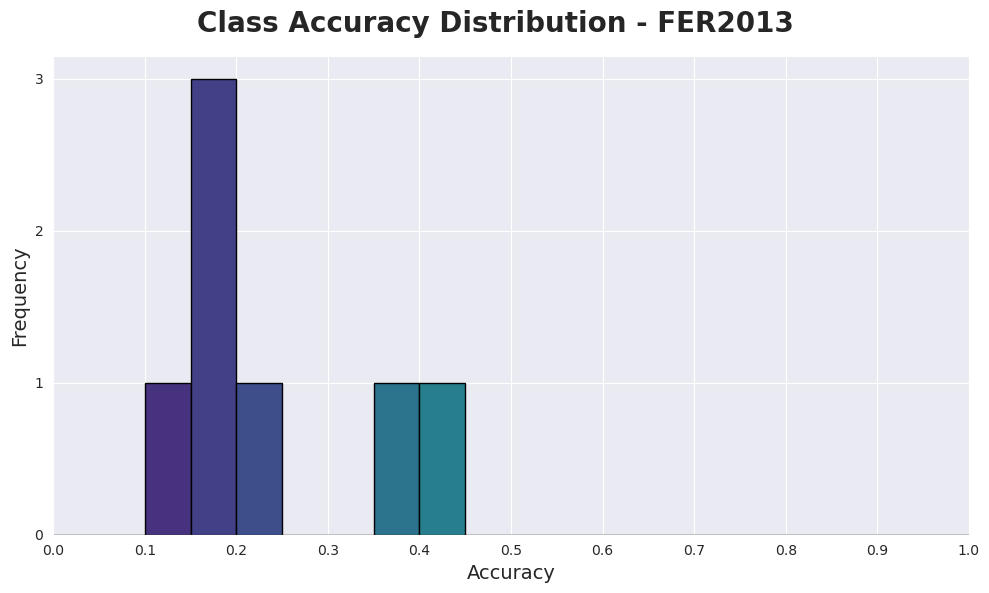

In [90]:
plot_per_class_accuracies(
    fer2013_per_class_acc,
    'FER2013',
    num_bins=20
)

#### PCam

In [91]:
swin_pcam_2 = Backbone(model_names['Swin'], num_classes=len(pcam_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([2, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [92]:
get_model_params(swin_pcam_2)

Parameters: 86.75M


In [93]:
pcam_loss, pcam_acc, pcam_per_class_acc = train_model(
    swin_pcam_2,
    pcam_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=2
)

100%|██████████| 1/1 [00:00<00:00, 17.16it/s]


Epochs: 1/10 | train_loss: 0.5996 | train_acc: 0.7500


100%|██████████| 1/1 [00:00<00:00, 18.04it/s]


Epochs: 2/10 | train_loss: 0.6235 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 18.12it/s]


Epochs: 3/10 | train_loss: 0.5692 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 18.12it/s]


Epochs: 4/10 | train_loss: 0.4756 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 18.10it/s]


Epochs: 5/10 | train_loss: 0.4174 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 17.02it/s]


Epochs: 6/10 | train_loss: 0.2864 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 18.14it/s]


Epochs: 7/10 | train_loss: 0.2979 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 18.26it/s]


Epochs: 8/10 | train_loss: 0.3090 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 18.16it/s]


Epochs: 9/10 | train_loss: 0.2750 | train_acc: 1.0000


100%|██████████| 1/1 [00:00<00:00, 18.27it/s]

Epochs: 10/10 | train_loss: 0.2023 | train_acc: 1.0000


In [94]:
pcam_loss, pcam_acc, pcam_per_class_acc = evaluate_model(
    swin_pcam_2,
    pcam_test,
    config
)

100%|██████████| 4096/4096 [06:41<00:00, 10.19it/s]

test_loss: 0.8059 | test_acc: 0.4842


In [95]:
pcam_accs.append(pcam_acc)

In [96]:
pcam_per_class_acc

{'healthy lymph node tissue': 0.41577695076566407,
 'lymph node tumor tissue': 0.5527263845637174}

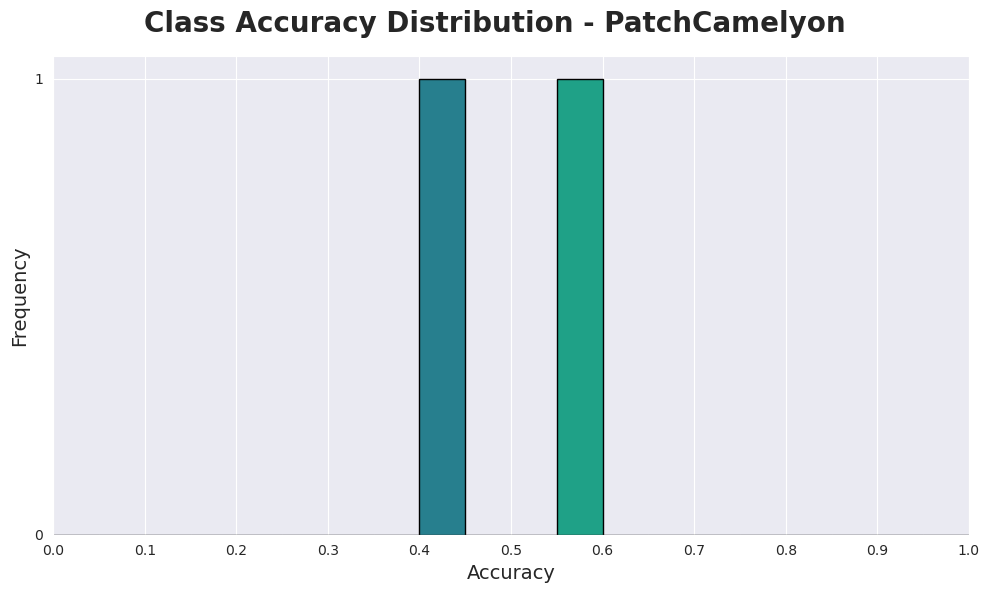

In [97]:
plot_per_class_accuracies(
    pcam_per_class_acc,
    'PatchCamelyon',
    num_bins=20
)

#### SUN397

In [98]:
swin_sun397_2 = Backbone(model_names['Swin'], num_classes=len(sun397_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([397]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([397, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [99]:
get_model_params(swin_sun397_2)

Parameters: 87.15M


In [100]:
sun397_loss, sun397_acc, sun397_per_class_acc = train_model(
    swin_sun397_2,
    sun397_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=2
)

100%|██████████| 100/100 [00:12<00:00,  8.08it/s]


Epochs: 1/10 | train_loss: 6.1841 | train_acc: 0.0403


100%|██████████| 100/100 [00:12<00:00,  8.11it/s]


Epochs: 2/10 | train_loss: 2.3939 | train_acc: 0.8186


100%|██████████| 100/100 [00:12<00:00,  8.14it/s]


Epochs: 3/10 | train_loss: 0.5815 | train_acc: 0.9798


100%|██████████| 100/100 [00:12<00:00,  8.13it/s]


Epochs: 4/10 | train_loss: 0.2134 | train_acc: 0.9924


100%|██████████| 100/100 [00:12<00:00,  8.14it/s]


Epochs: 5/10 | train_loss: 0.1283 | train_acc: 0.9962


100%|██████████| 100/100 [00:12<00:00,  8.14it/s]


Epochs: 6/10 | train_loss: 0.0822 | train_acc: 1.0000


100%|██████████| 100/100 [00:12<00:00,  7.91it/s]


Epochs: 7/10 | train_loss: 0.0565 | train_acc: 1.0000


100%|██████████| 100/100 [00:12<00:00,  8.14it/s]


Epochs: 8/10 | train_loss: 0.0473 | train_acc: 1.0000


100%|██████████| 100/100 [00:12<00:00,  8.04it/s]


Epochs: 9/10 | train_loss: 0.0419 | train_acc: 1.0000


100%|██████████| 100/100 [00:12<00:00,  8.12it/s]

Epochs: 10/10 | train_loss: 0.0349 | train_acc: 1.0000


In [101]:
sun397_loss, sun397_acc, sun397_per_class_acc = evaluate_model(
    swin_sun397_2,
    sun397_test,
    config
)

100%|██████████| 2719/2719 [05:36<00:00,  8.07it/s]


test_loss: 1.9598 | test_acc: 0.5297


In [102]:
sun397_accs.append(sun397_acc)

In [104]:
get_top_5_accuracies(sun397_per_class_acc)

[('arrival gate (outdoor)', 1.0),
 ('oilrig', 1.0),
 ('raft', 1.0),
 ('rope bridge', 1.0),
 ('sauna', 1.0)]

In [105]:
get_bottom_5_accuracies(sun397_per_class_acc)

[('bazaar (outdoor)', 0.0),
 ('canal (natural)', 0.0),
 ('courtyard', 0.0),
 ('outhouse (outdoor)', 0.0),
 ('park', 0.0)]

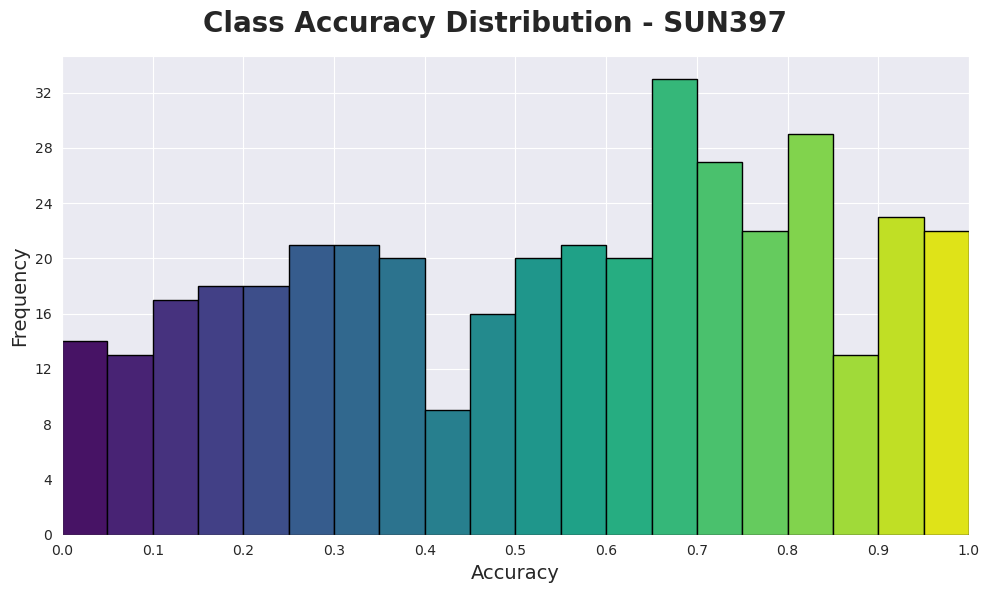

In [106]:
plot_per_class_accuracies(
    sun397_per_class_acc,
    'SUN397',
    num_bins=20
)

#### DTD

In [107]:
swin_dtd_2 = Backbone(model_names['Swin'], num_classes=len(dtd_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([47]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([47, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [108]:
get_model_params(swin_dtd_2)

Parameters: 86.79M


In [109]:
dtd_loss, dtd_acc, dtd_per_class_acc = train_model(
    swin_dtd_2,
    dtd_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=2
)

100%|██████████| 12/12 [00:01<00:00,  7.87it/s]


Epochs: 1/10 | train_loss: 3.9216 | train_acc: 0.0638


100%|██████████| 12/12 [00:01<00:00,  7.86it/s]


Epochs: 2/10 | train_loss: 2.4417 | train_acc: 0.7979


100%|██████████| 12/12 [00:01<00:00,  7.88it/s]


Epochs: 3/10 | train_loss: 1.4692 | train_acc: 0.9787


100%|██████████| 12/12 [00:01<00:00,  7.89it/s]


Epochs: 4/10 | train_loss: 0.8190 | train_acc: 1.0000


100%|██████████| 12/12 [00:01<00:00,  7.86it/s]


Epochs: 5/10 | train_loss: 0.4131 | train_acc: 1.0000


100%|██████████| 12/12 [00:01<00:00,  7.85it/s]


Epochs: 6/10 | train_loss: 0.2805 | train_acc: 1.0000


100%|██████████| 12/12 [00:01<00:00,  7.89it/s]


Epochs: 7/10 | train_loss: 0.1859 | train_acc: 1.0000


100%|██████████| 12/12 [00:01<00:00,  7.92it/s]


Epochs: 8/10 | train_loss: 0.1310 | train_acc: 1.0000


100%|██████████| 12/12 [00:01<00:00,  7.90it/s]


Epochs: 9/10 | train_loss: 0.1074 | train_acc: 1.0000


100%|██████████| 12/12 [00:01<00:00,  7.86it/s]

Epochs: 10/10 | train_loss: 0.0989 | train_acc: 1.0000


In [110]:
dtd_loss, dtd_acc, dtd_per_class_acc = evaluate_model(
    swin_dtd_2,
    dtd_test,
    config
)

100%|██████████| 235/235 [00:28<00:00,  8.19it/s]

test_loss: 2.3659 | test_acc: 0.4676


In [111]:
dtd_accs.append(dtd_acc)

In [113]:
get_top_5_accuracies(dtd_per_class_acc)

[('knitted', 0.975),
 ('cobwebbed', 0.925),
 ('honeycombed', 0.875),
 ('paisley', 0.85),
 ('waffled', 0.8)]

In [114]:
get_bottom_5_accuracies(dtd_per_class_acc)

[('zigzagged', 0.05),
 ('flecked', 0.1),
 ('blotchy', 0.125),
 ('grooved', 0.125),
 ('braided', 0.15)]

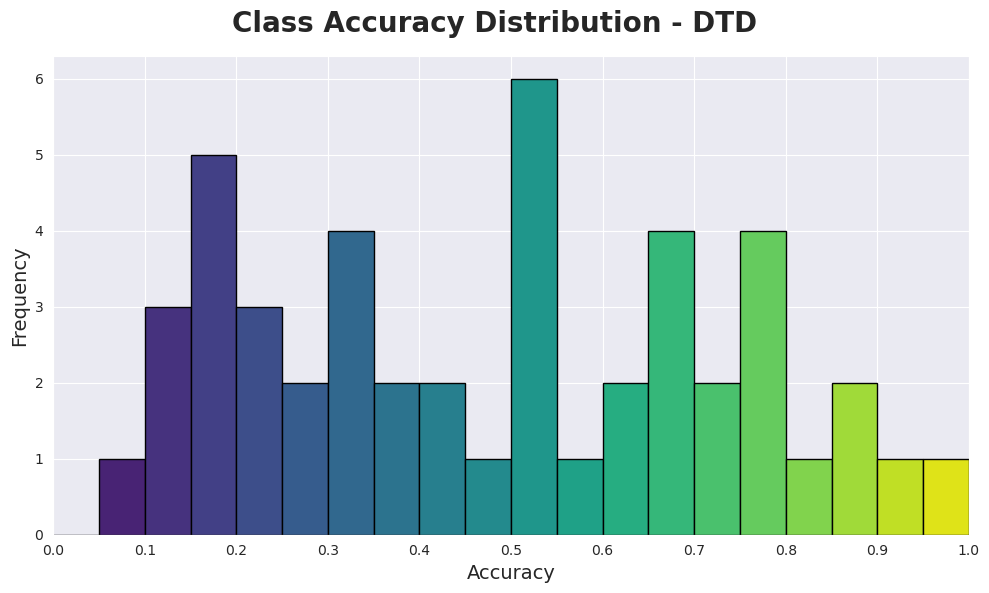

In [115]:
plot_per_class_accuracies(
    dtd_per_class_acc,
    'DTD',
    num_bins=20
)

### Few-Shot Linear Probing (n=4)


Model is shown only 4 images per class from the dataset.

#### RESISC45

In [116]:
swin_resisc45_4 = Backbone(model_names['Swin'], num_classes=len(resisc45_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([45]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([45, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [117]:
get_model_params(swin_resisc45_4)

Parameters: 86.79M


In [118]:
resisc45_loss, resisc45_acc, resisc45_per_class_acc = train_model(
    swin_resisc45_4,
    resisc45_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=4
)

100%|██████████| 23/23 [00:02<00:00,  9.73it/s]


Epochs: 1/10 | train_loss: 3.9187 | train_acc: 0.0722


100%|██████████| 23/23 [00:02<00:00,  9.74it/s]


Epochs: 2/10 | train_loss: 2.1836 | train_acc: 0.6722


100%|██████████| 23/23 [00:02<00:00,  9.74it/s]


Epochs: 3/10 | train_loss: 1.3573 | train_acc: 0.8444


100%|██████████| 23/23 [00:02<00:00,  9.75it/s]


Epochs: 4/10 | train_loss: 0.9146 | train_acc: 0.9111


100%|██████████| 23/23 [00:02<00:00,  9.78it/s]


Epochs: 5/10 | train_loss: 0.5814 | train_acc: 0.9833


100%|██████████| 23/23 [00:02<00:00,  9.78it/s]


Epochs: 6/10 | train_loss: 0.4075 | train_acc: 0.9833


100%|██████████| 23/23 [00:02<00:00,  9.77it/s]


Epochs: 7/10 | train_loss: 0.3823 | train_acc: 0.9889


100%|██████████| 23/23 [00:02<00:00,  9.69it/s]


Epochs: 8/10 | train_loss: 0.2581 | train_acc: 0.9944


100%|██████████| 23/23 [00:02<00:00,  9.75it/s]


Epochs: 9/10 | train_loss: 0.2361 | train_acc: 0.9944


100%|██████████| 23/23 [00:02<00:00,  9.74it/s]

Epochs: 10/10 | train_loss: 0.2045 | train_acc: 0.9833


In [119]:
resisc45_loss, resisc45_acc, resisc45_per_class_acc = evaluate_model(
    swin_resisc45_4,
    resisc45_test,
    config
)

100%|██████████| 788/788 [01:21<00:00,  9.65it/s]

test_loss: 1.3952 | test_acc: 0.6321


In [120]:
resisc45_accs.append(resisc45_acc)

In [121]:
get_top_5_accuracies(resisc45_per_class_acc)

[('sea ice', 0.9536423841059603),
 ('beach', 0.9153846153846154),
 ('ship', 0.9111111111111111),
 ('forest', 0.8972602739726028),
 ('cloud', 0.8867924528301887)]

In [122]:
get_bottom_5_accuracies(resisc45_per_class_acc)

[('basketball court', 0.19402985074626866),
 ('palace', 0.22142857142857142),
 ('lake', 0.22900763358778625),
 ('ground track field', 0.3858267716535433),
 ('dense residential', 0.4027777777777778)]

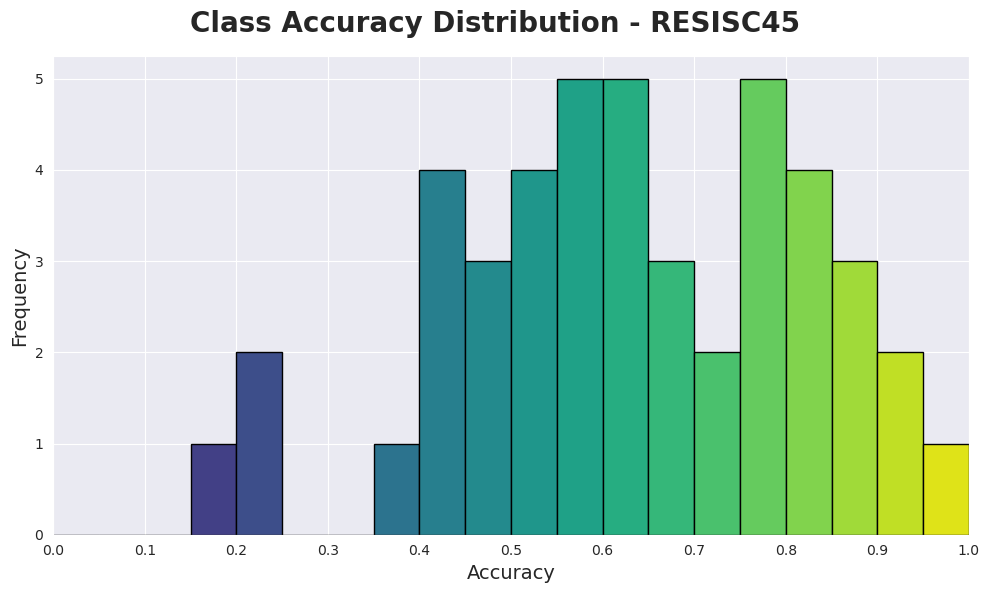

In [123]:
plot_per_class_accuracies(
    resisc45_per_class_acc,
    'RESISC45',
    num_bins=20
)

#### Food-101

In [124]:
swin_food101_4 = Backbone(model_names['Swin'], num_classes=len(food101_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([101]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([101, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [125]:
get_model_params(swin_food101_4)

Parameters: 86.85M


In [126]:
food101_loss, food101_acc, food101_per_class_acc = train_model(
    swin_food101_4,
    food101_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=4
)

/opt/conda/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 51/51 [00:06<00:00,  8.30it/s]


Epochs: 1/10 | train_loss: 4.4797 | train_acc: 0.0916


100%|██████████| 51/51 [00:06<00:00,  8.30it/s]


Epochs: 2/10 | train_loss: 2.0494 | train_acc: 0.7871


100%|██████████| 51/51 [00:06<00:00,  7.91it/s]


Epochs: 3/10 | train_loss: 0.9113 | train_acc: 0.9629


100%|██████████| 51/51 [00:06<00:00,  8.33it/s]


Epochs: 4/10 | train_loss: 0.4984 | train_acc: 0.9851


100%|██████████| 51/51 [00:06<00:00,  8.33it/s]


Epochs: 5/10 | train_loss: 0.3159 | train_acc: 0.9926


100%|██████████| 51/51 [00:06<00:00,  8.27it/s]


Epochs: 6/10 | train_loss: 0.2321 | train_acc: 0.9926


100%|██████████| 51/51 [00:06<00:00,  8.29it/s]


Epochs: 7/10 | train_loss: 0.1696 | train_acc: 0.9975


100%|██████████| 51/51 [00:06<00:00,  8.29it/s]


Epochs: 8/10 | train_loss: 0.1305 | train_acc: 0.9950


100%|██████████| 51/51 [00:06<00:00,  8.25it/s]


Epochs: 9/10 | train_loss: 0.0970 | train_acc: 1.0000


100%|██████████| 51/51 [00:06<00:00,  8.26it/s]

Epochs: 10/10 | train_loss: 0.0916 | train_acc: 0.9975


In [127]:
food101_loss, food101_acc, food101_per_class_acc = evaluate_model(
    swin_food101_4,
    food101_validation,
    config
)

100%|██████████| 3157/3157 [06:17<00:00,  8.36it/s]


test_loss: 1.2897 | test_acc: 0.6688


In [128]:
food101_accs.append(food101_acc)

In [129]:
get_top_5_accuracies(food101_per_class_acc)

[('guacamole', 0.988),
 ('spaghetti carbonara', 0.984),
 ('pizza', 0.972),
 ('edamame', 0.964),
 ('oysters', 0.964)]

In [130]:
get_bottom_5_accuracies(food101_per_class_acc)

[('steak', 0.116),
 ('ravioli', 0.14),
 ('grilled salmon', 0.204),
 ('gnocchi', 0.228),
 ('scallops', 0.232)]

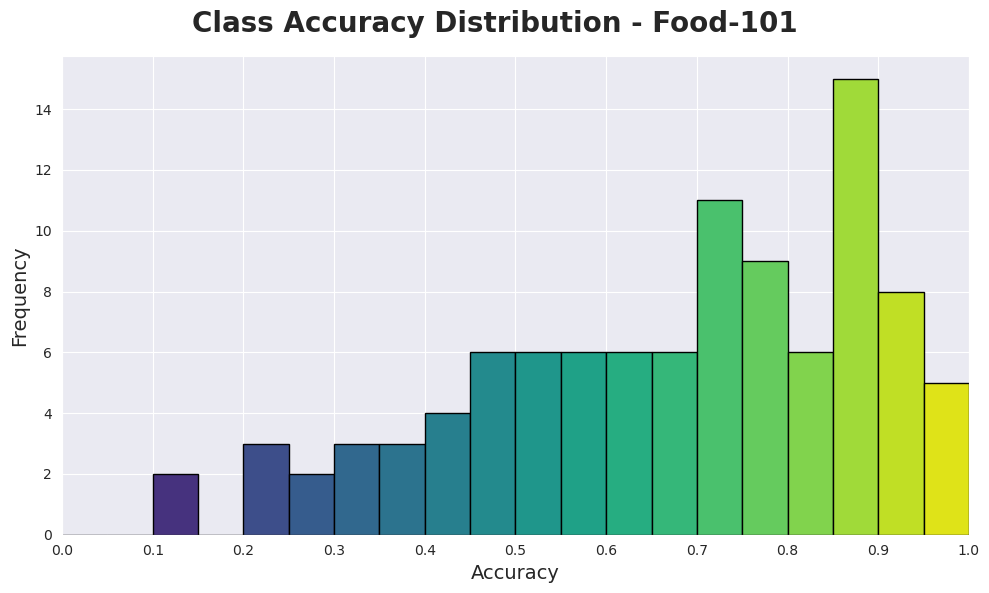

In [131]:
plot_per_class_accuracies(
    food101_per_class_acc,
    'Food-101',
    num_bins=20
)

#### FER2013

In [132]:
swin_fer2013_4 = Backbone(model_names['Swin'], num_classes=len(fer2013_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([7]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([7, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [133]:
get_model_params(swin_fer2013_4)

Parameters: 86.75M


In [134]:
fer2013_loss, fer2013_acc, fer2013_per_class_acc = train_model(
    swin_fer2013_4,
    fer2013_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=4
)

100%|██████████| 4/4 [00:00<00:00, 11.35it/s]


Epochs: 1/10 | train_loss: 2.1661 | train_acc: 0.0714


100%|██████████| 4/4 [00:00<00:00, 11.40it/s]


Epochs: 2/10 | train_loss: 1.6087 | train_acc: 0.5357


100%|██████████| 4/4 [00:00<00:00, 11.46it/s]


Epochs: 3/10 | train_loss: 1.3159 | train_acc: 0.6071


100%|██████████| 4/4 [00:00<00:00, 11.50it/s]


Epochs: 4/10 | train_loss: 1.1603 | train_acc: 0.7143


100%|██████████| 4/4 [00:00<00:00, 11.48it/s]


Epochs: 5/10 | train_loss: 0.9239 | train_acc: 0.9286


100%|██████████| 4/4 [00:00<00:00, 11.51it/s]


Epochs: 6/10 | train_loss: 0.7317 | train_acc: 0.9643


100%|██████████| 4/4 [00:00<00:00, 11.53it/s]


Epochs: 7/10 | train_loss: 0.6292 | train_acc: 0.9643


100%|██████████| 4/4 [00:00<00:00, 11.49it/s]


Epochs: 8/10 | train_loss: 0.5403 | train_acc: 1.0000


100%|██████████| 4/4 [00:00<00:00, 11.53it/s]


Epochs: 9/10 | train_loss: 0.4524 | train_acc: 1.0000


100%|██████████| 4/4 [00:00<00:00, 11.48it/s]

Epochs: 10/10 | train_loss: 0.3700 | train_acc: 1.0000


In [135]:
fer2013_loss, fer2013_acc, fer2013_per_class_acc = evaluate_model(
    swin_fer2013_4,
    fer2013_test,
    config
)

100%|██████████| 449/449 [00:43<00:00, 10.30it/s]

test_loss: 1.7998 | test_acc: 0.3174


In [136]:
fer2013_accs.append(fer2013_acc)

In [138]:
fer2013_per_class_acc

{'angry': 0.20773930753564154,
 'disgust': 0.3090909090909091,
 'fear': 0.26704545454545453,
 'happy': 0.43686006825938567,
 'sad': 0.2255892255892256,
 'surprise': 0.23557692307692307,
 'neutral': 0.42012779552715657}

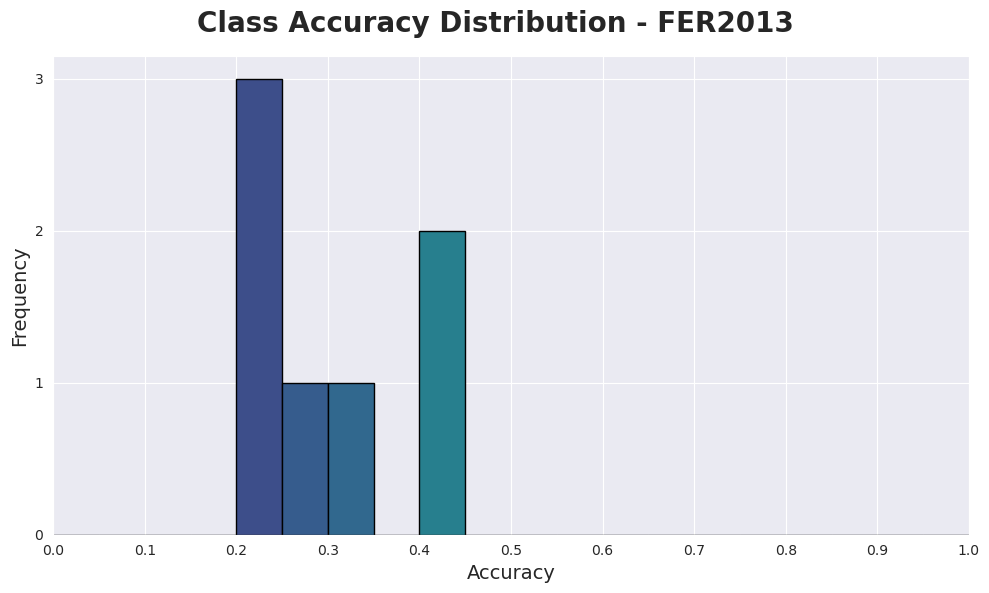

In [139]:
plot_per_class_accuracies(
    fer2013_per_class_acc,
    'FER2013',
    num_bins=20
)

#### PCam

In [140]:
swin_pcam_4 = Backbone(model_names['Swin'], num_classes=len(pcam_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([2, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [141]:
get_model_params(swin_pcam_4)

Parameters: 86.75M


In [142]:
pcam_loss, pcam_acc, pcam_per_class_acc = train_model(
    swin_pcam_4,
    pcam_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=4
)

100%|██████████| 1/1 [00:00<00:00,  9.45it/s]


Epochs: 1/10 | train_loss: 0.8865 | train_acc: 0.3750


100%|██████████| 1/1 [00:00<00:00,  9.81it/s]


Epochs: 2/10 | train_loss: 0.7258 | train_acc: 0.5000


100%|██████████| 1/1 [00:00<00:00, 10.13it/s]


Epochs: 3/10 | train_loss: 0.6911 | train_acc: 0.5000


100%|██████████| 1/1 [00:00<00:00,  9.67it/s]


Epochs: 4/10 | train_loss: 0.7816 | train_acc: 0.5000


100%|██████████| 1/1 [00:00<00:00, 10.15it/s]


Epochs: 5/10 | train_loss: 0.6382 | train_acc: 0.6250


100%|██████████| 1/1 [00:00<00:00, 10.11it/s]


Epochs: 6/10 | train_loss: 0.5791 | train_acc: 0.6250


100%|██████████| 1/1 [00:00<00:00, 10.18it/s]


Epochs: 7/10 | train_loss: 0.5531 | train_acc: 0.7500


100%|██████████| 1/1 [00:00<00:00, 10.15it/s]


Epochs: 8/10 | train_loss: 0.4799 | train_acc: 0.8750


100%|██████████| 1/1 [00:00<00:00, 10.10it/s]


Epochs: 9/10 | train_loss: 0.5157 | train_acc: 0.7500


100%|██████████| 1/1 [00:00<00:00, 10.15it/s]

Epochs: 10/10 | train_loss: 0.4815 | train_acc: 0.7500


In [143]:
pcam_loss, pcam_acc, pcam_per_class_acc = evaluate_model(
    swin_pcam_4,
    pcam_test,
    config
)

100%|██████████| 4096/4096 [06:40<00:00, 10.22it/s]

test_loss: 0.7835 | test_acc: 0.4269


In [144]:
pcam_accs.append(pcam_acc)

In [146]:
pcam_per_class_acc

{'healthy lymph node tissue': 0.6089927399182479,
 'lymph node tumor tissue': 0.24461134517921476}

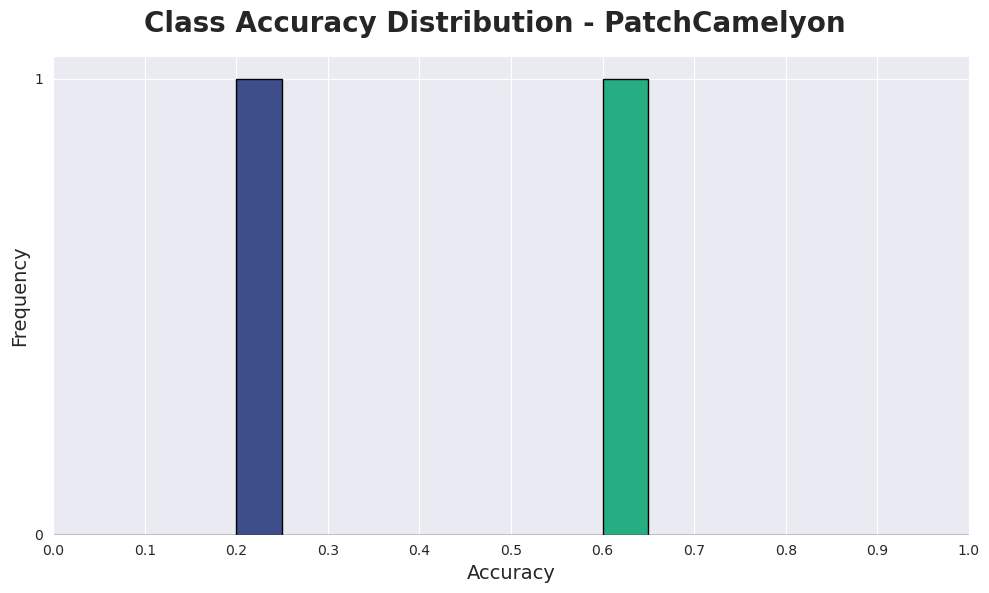

In [147]:
plot_per_class_accuracies(
    pcam_per_class_acc,
    'PatchCamelyon',
    num_bins=20
)

#### SUN397

In [148]:
swin_sun397_4 = Backbone(model_names['Swin'], num_classes=len(sun397_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([397]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([397, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [149]:
get_model_params(swin_sun397_4)

Parameters: 87.15M


In [150]:
sun397_loss, sun397_acc, sun397_per_class_acc = train_model(
    swin_sun397_4,
    sun397_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=4
)

100%|██████████| 199/199 [00:24<00:00,  8.00it/s]


Epochs: 1/10 | train_loss: 5.2076 | train_acc: 0.1625


100%|██████████| 199/199 [00:24<00:00,  8.07it/s]


Epochs: 2/10 | train_loss: 1.1765 | train_acc: 0.8293


100%|██████████| 199/199 [00:24<00:00,  8.09it/s]


Epochs: 3/10 | train_loss: 0.3176 | train_acc: 0.9666


100%|██████████| 199/199 [00:24<00:00,  8.09it/s]


Epochs: 4/10 | train_loss: 0.1597 | train_acc: 0.9918


100%|██████████| 199/199 [00:25<00:00,  7.93it/s]


Epochs: 5/10 | train_loss: 0.0911 | train_acc: 0.9981


100%|██████████| 199/199 [00:24<00:00,  8.08it/s]


Epochs: 6/10 | train_loss: 0.0595 | train_acc: 0.9981


100%|██████████| 199/199 [00:24<00:00,  8.09it/s]


Epochs: 7/10 | train_loss: 0.0464 | train_acc: 0.9994


100%|██████████| 199/199 [00:24<00:00,  8.10it/s]


Epochs: 8/10 | train_loss: 0.0404 | train_acc: 0.9994


100%|██████████| 199/199 [00:24<00:00,  8.09it/s]


Epochs: 9/10 | train_loss: 0.0318 | train_acc: 0.9994


100%|██████████| 199/199 [00:24<00:00,  7.97it/s]


Epochs: 10/10 | train_loss: 0.0268 | train_acc: 0.9975


In [151]:
sun397_loss, sun397_acc, sun397_per_class_acc = evaluate_model(
    swin_sun397_4,
    sun397_test,
    config
)

100%|██████████| 2719/2719 [05:37<00:00,  8.06it/s]


test_loss: 1.4358 | test_acc: 0.6230


In [152]:
sun397_accs.append(sun397_acc)

In [154]:
get_top_5_accuracies(sun397_per_class_acc)

[('bus interior', 1.0),
 ('dam', 1.0),
 ('greenhouse (outdoor)', 1.0),
 ('oilrig', 1.0),
 ('parking garage (indoor)', 1.0)]

In [155]:
get_bottom_5_accuracies(sun397_per_class_acc)

[('coffee shop', 0.037037037037037035),
 ('library (outdoor)', 0.047619047619047616),
 ('building facade', 0.05555555555555555),
 ('palace', 0.06382978723404255),
 ('nuclear power plant (outdoor)', 0.09090909090909091)]

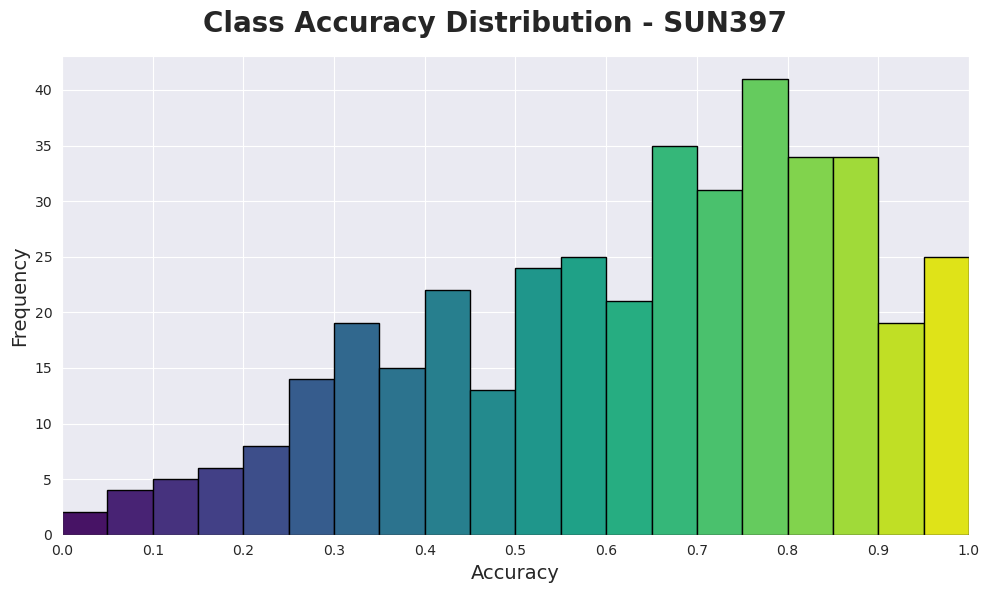

In [156]:
plot_per_class_accuracies(
    sun397_per_class_acc,
    'SUN397',
    num_bins=20
)

#### DTD

In [157]:
swin_dtd_4 = Backbone(model_names['Swin'], num_classes=len(dtd_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([47]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([47, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [158]:
get_model_params(swin_dtd_4)

Parameters: 86.79M


In [159]:
dtd_loss, dtd_acc, dtd_per_class_acc = train_model(
    swin_dtd_4,
    dtd_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=4
)

100%|██████████| 24/24 [00:03<00:00,  7.82it/s]


Epochs: 1/10 | train_loss: 3.6827 | train_acc: 0.1170


100%|██████████| 24/24 [00:03<00:00,  7.81it/s]


Epochs: 2/10 | train_loss: 2.0207 | train_acc: 0.8032


100%|██████████| 24/24 [00:03<00:00,  7.87it/s]


Epochs: 3/10 | train_loss: 1.0443 | train_acc: 0.9521


100%|██████████| 24/24 [00:03<00:00,  7.91it/s]


Epochs: 4/10 | train_loss: 0.5646 | train_acc: 0.9787


100%|██████████| 24/24 [00:03<00:00,  7.84it/s]


Epochs: 5/10 | train_loss: 0.3314 | train_acc: 1.0000


100%|██████████| 24/24 [00:03<00:00,  7.86it/s]


Epochs: 6/10 | train_loss: 0.2507 | train_acc: 1.0000


100%|██████████| 24/24 [00:03<00:00,  7.86it/s]


Epochs: 7/10 | train_loss: 0.1893 | train_acc: 1.0000


100%|██████████| 24/24 [00:03<00:00,  7.81it/s]


Epochs: 8/10 | train_loss: 0.1393 | train_acc: 0.9947


100%|██████████| 24/24 [00:03<00:00,  7.79it/s]


Epochs: 9/10 | train_loss: 0.0985 | train_acc: 1.0000


100%|██████████| 24/24 [00:03<00:00,  7.83it/s]


Epochs: 10/10 | train_loss: 0.1091 | train_acc: 0.9947


In [160]:
dtd_loss, dtd_acc, dtd_per_class_acc = evaluate_model(
    swin_dtd_4,
    dtd_test,
    config
)

100%|██████████| 235/235 [00:28<00:00,  8.17it/s]

test_loss: 1.9357 | test_acc: 0.5223


In [161]:
dtd_accs.append(dtd_acc)

In [162]:
get_top_5_accuracies(dtd_per_class_acc)

[('cobwebbed', 0.925),
 ('frilly', 0.925),
 ('knitted', 0.925),
 ('honeycombed', 0.875),
 ('bubbly', 0.85)]

In [163]:
get_bottom_5_accuracies(dtd_per_class_acc)

[('porous', 0.125),
 ('blotchy', 0.15),
 ('flecked', 0.175),
 ('grooved', 0.175),
 ('pitted', 0.2)]

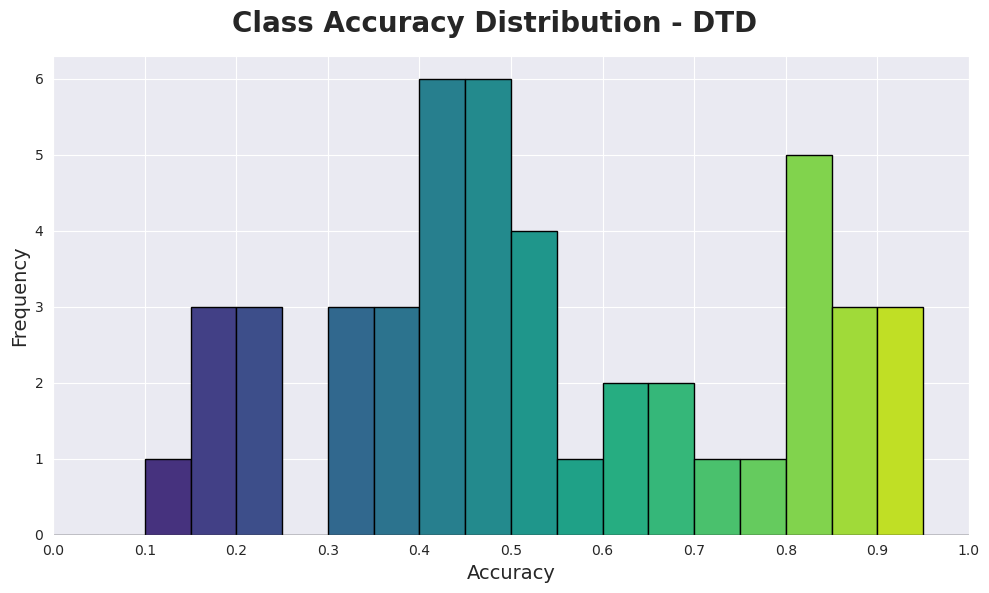

In [164]:
plot_per_class_accuracies(
    dtd_per_class_acc,
    'DTD',
    num_bins=20
)

### Few-Shot Linear Probing (n=8)


Model is shown only 8 images per class from the dataset.

#### RESISC45

In [165]:
swin_resisc45_8 = Backbone(model_names['Swin'], num_classes=len(resisc45_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([45]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([45, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [166]:
get_model_params(swin_resisc45_8)

Parameters: 86.79M


In [167]:
resisc45_loss, resisc45_acc, resisc45_per_class_acc = train_model(
    swin_resisc45_8,
    resisc45_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=8
)

100%|██████████| 45/45 [00:04<00:00,  9.54it/s]


Epochs: 1/10 | train_loss: 3.4561 | train_acc: 0.1972


100%|██████████| 45/45 [00:04<00:00,  9.54it/s]


Epochs: 2/10 | train_loss: 1.6134 | train_acc: 0.7083


100%|██████████| 45/45 [00:04<00:00,  9.56it/s]


Epochs: 3/10 | train_loss: 0.9958 | train_acc: 0.8222


100%|██████████| 45/45 [00:04<00:00,  9.23it/s]


Epochs: 4/10 | train_loss: 0.7049 | train_acc: 0.9028


100%|██████████| 45/45 [00:04<00:00,  9.51it/s]


Epochs: 5/10 | train_loss: 0.5098 | train_acc: 0.9417


100%|██████████| 45/45 [00:04<00:00,  9.55it/s]


Epochs: 6/10 | train_loss: 0.3625 | train_acc: 0.9639


100%|██████████| 45/45 [00:04<00:00,  9.56it/s]


Epochs: 7/10 | train_loss: 0.3090 | train_acc: 0.9667


100%|██████████| 45/45 [00:04<00:00,  9.57it/s]


Epochs: 8/10 | train_loss: 0.2263 | train_acc: 0.9889


100%|██████████| 45/45 [00:04<00:00,  9.56it/s]


Epochs: 9/10 | train_loss: 0.2249 | train_acc: 0.9806


100%|██████████| 45/45 [00:04<00:00,  9.57it/s]

Epochs: 10/10 | train_loss: 0.1714 | train_acc: 0.9944


In [168]:
resisc45_loss, resisc45_acc, resisc45_per_class_acc = evaluate_model(
    swin_resisc45_8,
    resisc45_test,
    config
)

100%|██████████| 788/788 [01:21<00:00,  9.65it/s]


test_loss: 1.0223 | test_acc: 0.7111


In [169]:
resisc45_accs.append(resisc45_acc)

In [170]:
get_top_5_accuracies(resisc45_per_class_acc)

[('sea ice', 0.9536423841059603),
 ('ship', 0.9407407407407408),
 ('airplane', 0.9112426035502958),
 ('beach', 0.9076923076923077),
 ('thermal power station', 0.9025974025974026)]

In [171]:
get_bottom_5_accuracies(resisc45_per_class_acc)

[('palace', 0.3357142857142857),
 ('commercial area', 0.37857142857142856),
 ('medium residential', 0.3877551020408163),
 ('basketball court', 0.44776119402985076),
 ('dense residential', 0.5138888888888888)]

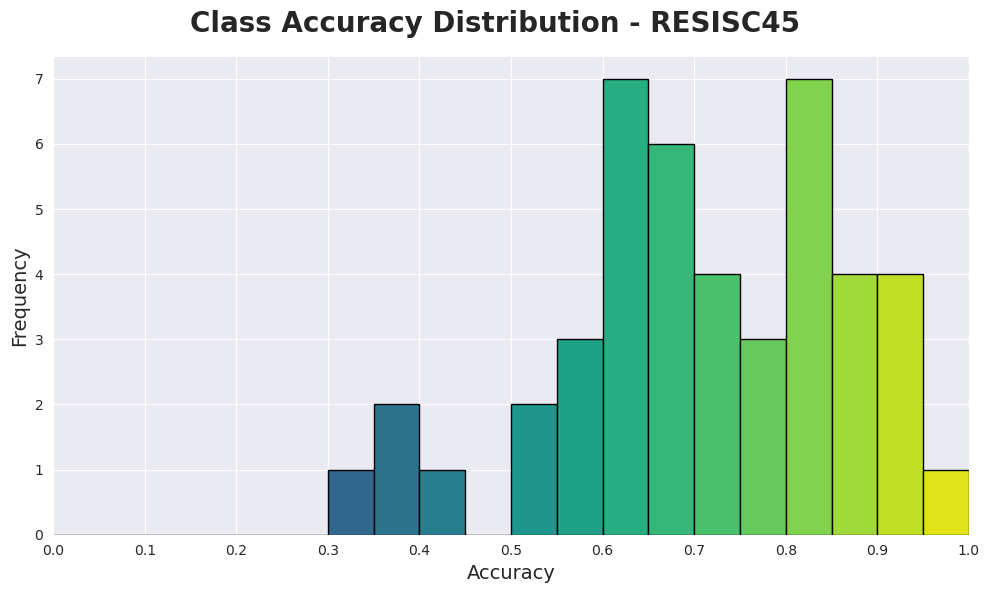

In [172]:
plot_per_class_accuracies(
    resisc45_per_class_acc,
    'RESISC45',
    num_bins=20
)

#### Food-101

In [173]:
swin_food101_8 = Backbone(model_names['Swin'], num_classes=len(food101_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([101]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([101, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [174]:
get_model_params(swin_food101_8)

Parameters: 86.85M


In [175]:
food101_loss, food101_acc, food101_per_class_acc = train_model(
    swin_food101_8,
    food101_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=8
)

/opt/conda/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 101/101 [00:12<00:00,  8.14it/s]


Epochs: 1/10 | train_loss: 3.7752 | train_acc: 0.2686


100%|██████████| 101/101 [00:12<00:00,  8.12it/s]


Epochs: 2/10 | train_loss: 1.3662 | train_acc: 0.7871


100%|██████████| 101/101 [00:12<00:00,  8.16it/s]


Epochs: 3/10 | train_loss: 0.6586 | train_acc: 0.9183


100%|██████████| 101/101 [00:12<00:00,  8.18it/s]


Epochs: 4/10 | train_loss: 0.3936 | train_acc: 0.9604


100%|██████████| 101/101 [00:12<00:00,  8.15it/s]


Epochs: 5/10 | train_loss: 0.2792 | train_acc: 0.9802


100%|██████████| 101/101 [00:12<00:00,  8.14it/s]


Epochs: 6/10 | train_loss: 0.1897 | train_acc: 0.9876


100%|██████████| 101/101 [00:12<00:00,  8.18it/s]


Epochs: 7/10 | train_loss: 0.1427 | train_acc: 0.9913


100%|██████████| 101/101 [00:12<00:00,  8.18it/s]


Epochs: 8/10 | train_loss: 0.1052 | train_acc: 0.9975


100%|██████████| 101/101 [00:12<00:00,  8.14it/s]


Epochs: 9/10 | train_loss: 0.0895 | train_acc: 0.9950


100%|██████████| 101/101 [00:12<00:00,  8.14it/s]

Epochs: 10/10 | train_loss: 0.0786 | train_acc: 0.9950


In [176]:
food101_loss, food101_acc, food101_per_class_acc = evaluate_model(
    swin_food101_8,
    food101_validation,
    config
)

100%|██████████| 3157/3157 [06:23<00:00,  8.23it/s]


test_loss: 0.9201 | test_acc: 0.7515


In [177]:
food101_accs.append(food101_acc)

In [178]:
get_top_5_accuracies(food101_per_class_acc)

[('edamame', 0.98),
 ('spaghetti carbonara', 0.976),
 ('oysters', 0.968),
 ('guacamole', 0.96),
 ('pizza', 0.94)]

In [179]:
get_bottom_5_accuracies(food101_per_class_acc)

[('ravioli', 0.116),
 ('scallops', 0.276),
 ('steak', 0.292),
 ('grilled salmon', 0.336),
 ('pork chop', 0.38)]

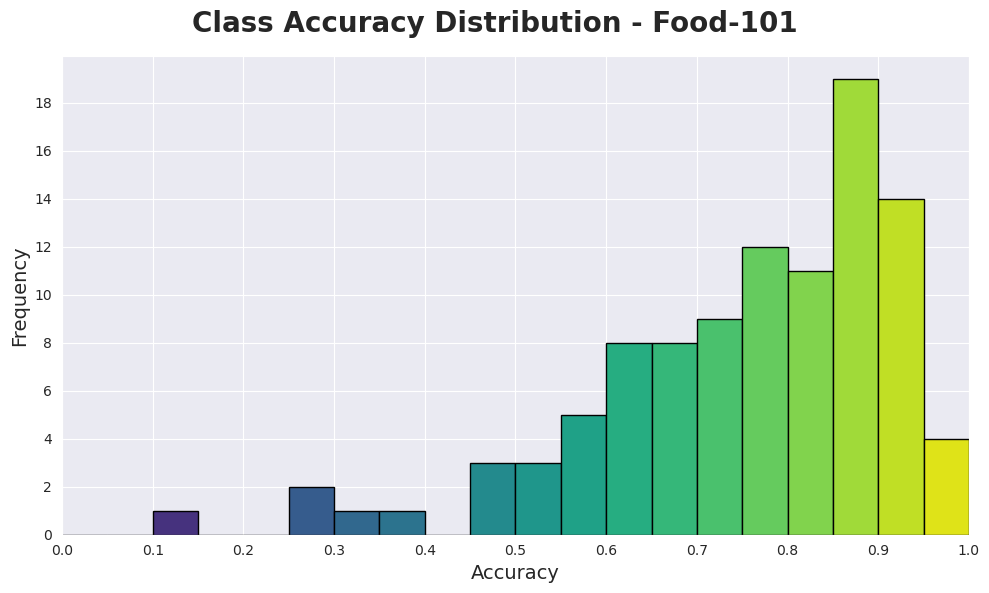

In [180]:
plot_per_class_accuracies(
    food101_per_class_acc,
    'Food-101',
    num_bins=20
)

#### FER2013

In [181]:
swin_fer2013_8 = Backbone(model_names['Swin'], num_classes=len(fer2013_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([7]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([7, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [182]:
get_model_params(swin_fer2013_8)

Parameters: 86.75M


In [183]:
fer2013_loss, fer2013_acc, fer2013_per_class_acc = train_model(
    swin_fer2013_8,
    fer2013_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=8
)

100%|██████████| 7/7 [00:00<00:00, 10.12it/s]


Epochs: 1/10 | train_loss: 2.0289 | train_acc: 0.1607


100%|██████████| 7/7 [00:00<00:00, 10.16it/s]


Epochs: 2/10 | train_loss: 1.5724 | train_acc: 0.4821


100%|██████████| 7/7 [00:00<00:00, 10.13it/s]


Epochs: 3/10 | train_loss: 1.2663 | train_acc: 0.6786


100%|██████████| 7/7 [00:00<00:00, 10.20it/s]


Epochs: 4/10 | train_loss: 1.0790 | train_acc: 0.7321


100%|██████████| 7/7 [00:00<00:00, 10.25it/s]


Epochs: 5/10 | train_loss: 0.8986 | train_acc: 0.8393


100%|██████████| 7/7 [00:00<00:00, 10.20it/s]


Epochs: 6/10 | train_loss: 0.7972 | train_acc: 0.8750


100%|██████████| 7/7 [00:00<00:00, 10.24it/s]


Epochs: 7/10 | train_loss: 0.7056 | train_acc: 0.8929


100%|██████████| 7/7 [00:00<00:00, 10.25it/s]


Epochs: 8/10 | train_loss: 0.6244 | train_acc: 0.8929


100%|██████████| 7/7 [00:00<00:00, 10.23it/s]


Epochs: 9/10 | train_loss: 0.5517 | train_acc: 0.9107


100%|██████████| 7/7 [00:00<00:00, 10.19it/s]

Epochs: 10/10 | train_loss: 0.4950 | train_acc: 0.9286


In [184]:
fer2013_loss, fer2013_acc, fer2013_per_class_acc = evaluate_model(
    swin_fer2013_8,
    fer2013_test,
    config
)

100%|██████████| 449/449 [00:43<00:00, 10.34it/s]

test_loss: 1.7808 | test_acc: 0.3631


In [185]:
fer2013_accs.append(fer2013_acc)

In [187]:
fer2013_per_class_acc

{'angry': 0.22810590631364563,
 'disgust': 0.32727272727272727,
 'fear': 0.3333333333333333,
 'happy': 0.5073947667804323,
 'sad': 0.2828282828282828,
 'surprise': 0.3629807692307692,
 'neutral': 0.3706070287539936}

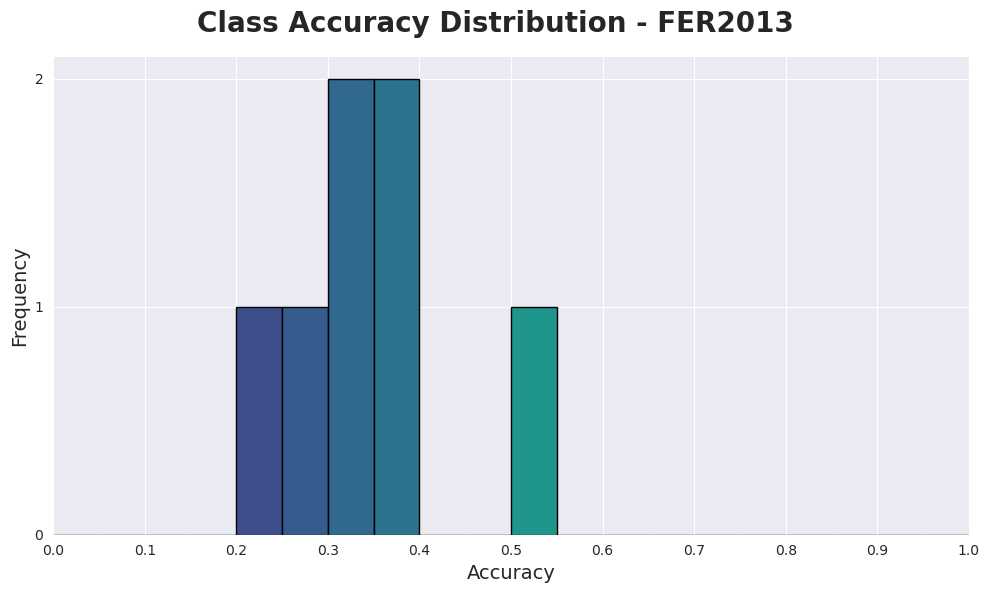

In [188]:
plot_per_class_accuracies(
    fer2013_per_class_acc,
    'FER2013',
    num_bins=20
)

#### PCam

In [189]:
swin_pcam_8 = Backbone(model_names['Swin'], num_classes=len(pcam_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([2, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [190]:
get_model_params(swin_pcam_8)

Parameters: 86.75M


In [191]:
pcam_loss, pcam_acc, pcam_per_class_acc = train_model(
    swin_pcam_8,
    pcam_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=8
)

100%|██████████| 2/2 [00:00<00:00,  9.87it/s]


Epochs: 1/10 | train_loss: 0.7989 | train_acc: 0.4375


100%|██████████| 2/2 [00:00<00:00,  9.81it/s]


Epochs: 2/10 | train_loss: 0.6825 | train_acc: 0.6250


100%|██████████| 2/2 [00:00<00:00, 10.00it/s]


Epochs: 3/10 | train_loss: 0.6074 | train_acc: 0.8125


100%|██████████| 2/2 [00:00<00:00,  9.99it/s]


Epochs: 4/10 | train_loss: 0.5413 | train_acc: 0.9375


100%|██████████| 2/2 [00:00<00:00,  9.99it/s]


Epochs: 5/10 | train_loss: 0.5131 | train_acc: 0.9375


100%|██████████| 2/2 [00:00<00:00,  9.89it/s]


Epochs: 6/10 | train_loss: 0.4915 | train_acc: 0.8125


100%|██████████| 2/2 [00:00<00:00, 10.01it/s]


Epochs: 7/10 | train_loss: 0.4428 | train_acc: 0.8750


100%|██████████| 2/2 [00:00<00:00,  9.94it/s]


Epochs: 8/10 | train_loss: 0.4280 | train_acc: 0.8750


100%|██████████| 2/2 [00:00<00:00,  9.95it/s]


Epochs: 9/10 | train_loss: 0.3775 | train_acc: 0.8750


100%|██████████| 2/2 [00:00<00:00, 10.05it/s]


Epochs: 10/10 | train_loss: 0.3858 | train_acc: 0.8750


In [192]:
pcam_loss, pcam_acc, pcam_per_class_acc = evaluate_model(
    swin_pcam_8,
    pcam_test,
    config
)

100%|██████████| 4096/4096 [06:43<00:00, 10.16it/s]

test_loss: 0.5352 | test_acc: 0.7495


In [193]:
pcam_accs.append(pcam_acc)

In [194]:
pcam_per_class_acc

{'healthy lymph node tissue': 0.7261912024891709,
 'lymph node tumor tissue': 0.7727911094828113}

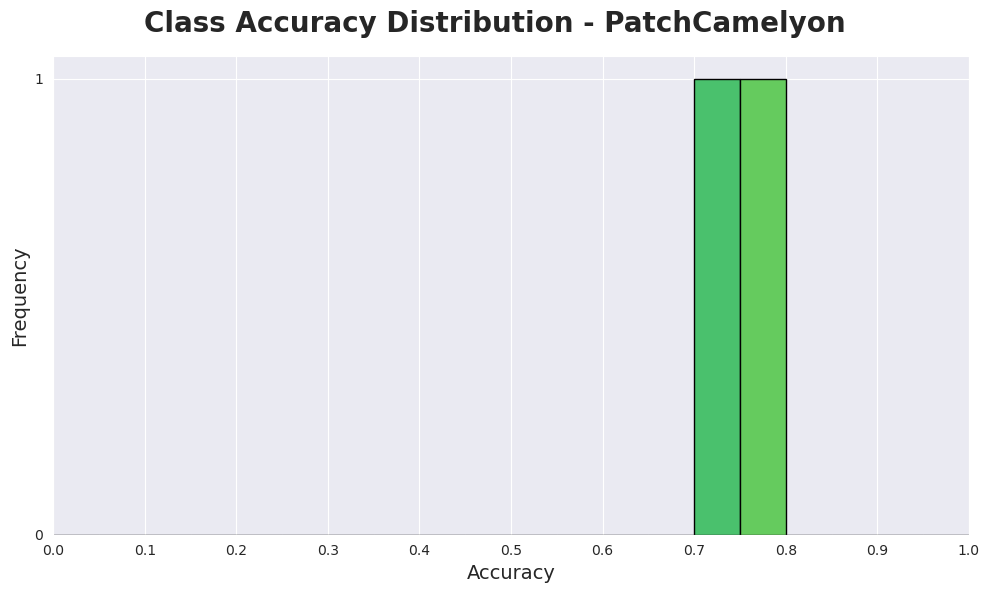

In [195]:
plot_per_class_accuracies(
    pcam_per_class_acc,
    'PatchCamelyon',
    num_bins=20
)

#### SUN397

In [196]:
swin_sun397_8 = Backbone(model_names['Swin'], num_classes=len(sun397_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([397]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([397, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [197]:
get_model_params(swin_sun397_8)

Parameters: 87.15M


In [198]:
sun397_loss, sun397_acc, sun397_per_class_acc = train_model(
    swin_sun397_8,
    sun397_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=8
)

100%|██████████| 397/397 [00:50<00:00,  7.92it/s]


Epochs: 1/10 | train_loss: 3.7324 | train_acc: 0.3508


100%|██████████| 397/397 [00:49<00:00,  7.99it/s]


Epochs: 2/10 | train_loss: 0.6691 | train_acc: 0.8463


100%|██████████| 397/397 [00:49<00:00,  8.04it/s]


Epochs: 3/10 | train_loss: 0.2471 | train_acc: 0.9572


100%|██████████| 397/397 [00:49<00:00,  8.00it/s]


Epochs: 4/10 | train_loss: 0.1258 | train_acc: 0.9827


100%|██████████| 397/397 [00:49<00:00,  8.04it/s]


Epochs: 5/10 | train_loss: 0.0803 | train_acc: 0.9874


100%|██████████| 397/397 [00:49<00:00,  8.05it/s]


Epochs: 6/10 | train_loss: 0.0577 | train_acc: 0.9943


100%|██████████| 397/397 [00:49<00:00,  7.97it/s]


Epochs: 7/10 | train_loss: 0.0473 | train_acc: 0.9959


100%|██████████| 397/397 [00:49<00:00,  8.02it/s]


Epochs: 8/10 | train_loss: 0.0346 | train_acc: 0.9981


100%|██████████| 397/397 [00:49<00:00,  8.00it/s]


Epochs: 9/10 | train_loss: 0.0272 | train_acc: 0.9975


100%|██████████| 397/397 [00:49<00:00,  8.03it/s]

Epochs: 10/10 | train_loss: 0.0218 | train_acc: 0.9981


In [199]:
sun397_loss, sun397_acc, sun397_per_class_acc = evaluate_model(
    swin_sun397_8,
    sun397_test,
    config
)

100%|██████████| 2719/2719 [05:38<00:00,  8.04it/s]


test_loss: 1.2641 | test_acc: 0.6714


In [200]:
sun397_accs.append(sun397_acc)

In [201]:
get_top_5_accuracies(sun397_per_class_acc)

[('bus interior', 1.0),
 ('greenhouse (outdoor)', 1.0),
 ('parking garage (indoor)', 1.0),
 ('raceway', 1.0),
 ('rock arch', 1.0)]

In [202]:
get_bottom_5_accuracies(sun397_per_class_acc)

[('garbage dump', 0.1111111111111111),
 ('office building', 0.12280701754385964),
 ('poolroom (home)', 0.15151515151515152),
 ('museum (indoor)', 0.15789473684210525),
 ('synagogue (indoor)', 0.1875)]

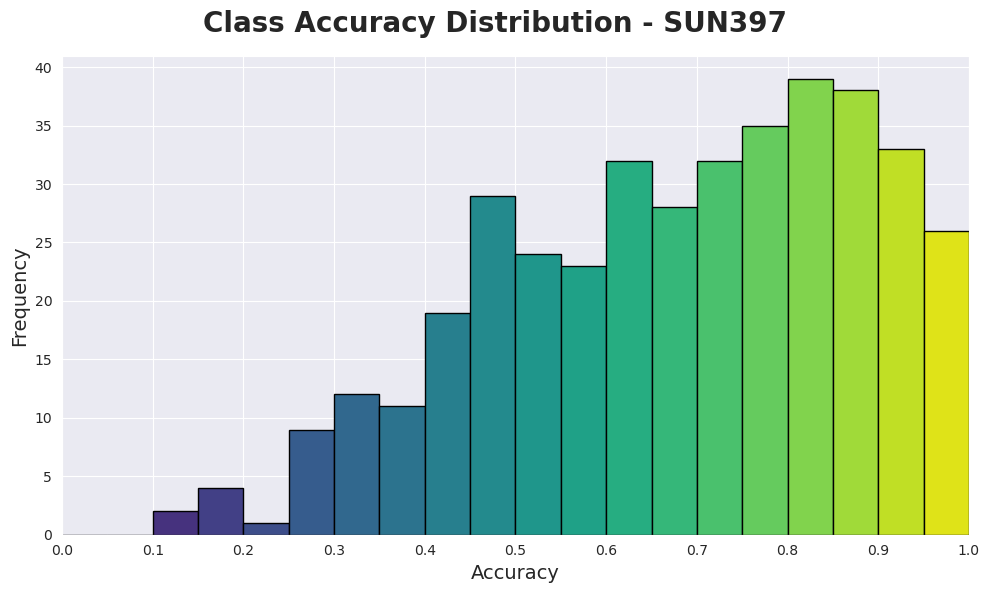

In [203]:
plot_per_class_accuracies(
    sun397_per_class_acc,
    'SUN397',
    num_bins=20
)

#### DTD

In [204]:
swin_dtd_8 = Backbone(model_names['Swin'], num_classes=len(dtd_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([47]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([47, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [205]:
get_model_params(swin_dtd_8)

Parameters: 86.79M


In [206]:
dtd_loss, dtd_acc, dtd_per_class_acc = train_model(
    swin_dtd_8,
    dtd_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=8
)

100%|██████████| 47/47 [00:06<00:00,  7.69it/s]


Epochs: 1/10 | train_loss: 3.3152 | train_acc: 0.2606


100%|██████████| 47/47 [00:06<00:00,  7.71it/s]


Epochs: 2/10 | train_loss: 1.3969 | train_acc: 0.8431


100%|██████████| 47/47 [00:06<00:00,  7.69it/s]


Epochs: 3/10 | train_loss: 0.6906 | train_acc: 0.9282


100%|██████████| 47/47 [00:06<00:00,  7.73it/s]


Epochs: 4/10 | train_loss: 0.3843 | train_acc: 0.9761


100%|██████████| 47/47 [00:06<00:00,  7.72it/s]


Epochs: 5/10 | train_loss: 0.2605 | train_acc: 0.9894


100%|██████████| 47/47 [00:06<00:00,  7.74it/s]


Epochs: 6/10 | train_loss: 0.1910 | train_acc: 0.9894


100%|██████████| 47/47 [00:06<00:00,  7.74it/s]


Epochs: 7/10 | train_loss: 0.1418 | train_acc: 0.9973


100%|██████████| 47/47 [00:06<00:00,  7.73it/s]


Epochs: 8/10 | train_loss: 0.1092 | train_acc: 0.9973


100%|██████████| 47/47 [00:06<00:00,  7.71it/s]


Epochs: 9/10 | train_loss: 0.0913 | train_acc: 0.9973


100%|██████████| 47/47 [00:06<00:00,  7.65it/s]

Epochs: 10/10 | train_loss: 0.0659 | train_acc: 0.9973


In [207]:
dtd_loss, dtd_acc, dtd_per_class_acc = evaluate_model(
    swin_dtd_8,
    dtd_test,
    config
)

100%|██████████| 235/235 [00:28<00:00,  8.11it/s]

test_loss: 1.5463 | test_acc: 0.5894


In [208]:
dtd_accs.append(dtd_acc)

In [209]:
get_top_5_accuracies(dtd_per_class_acc)

[('potholed', 0.925),
 ('stratified', 0.925),
 ('bubbly', 0.9),
 ('cobwebbed', 0.9),
 ('knitted', 0.9)]

In [210]:
get_bottom_5_accuracies(dtd_per_class_acc)

[('swirly', 0.15),
 ('blotchy', 0.2),
 ('flecked', 0.225),
 ('woven', 0.225),
 ('porous', 0.25)]

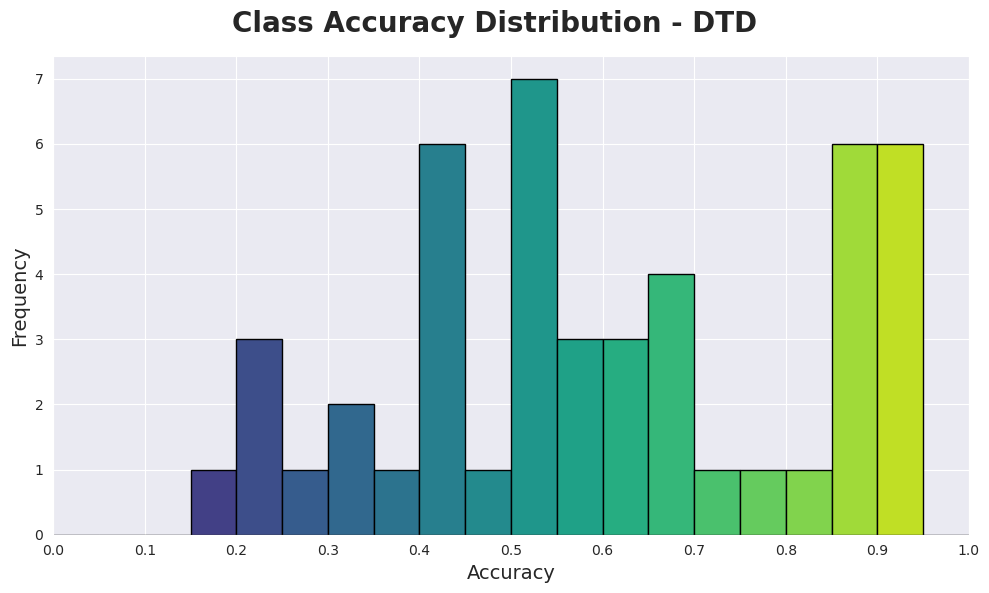

In [211]:
plot_per_class_accuracies(
    dtd_per_class_acc,
    'DTD',
    num_bins=20
)

### Few-Shot Linear Probing (n=16)


Model is shown only 16 images per class from the dataset.

#### RESISC45

In [212]:
swin_resisc45_16 = Backbone(model_names['Swin'], num_classes=len(resisc45_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([45]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([45, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [213]:
get_model_params(swin_resisc45_16)

Parameters: 86.79M


In [214]:
resisc45_loss, resisc45_acc, resisc45_per_class_acc = train_model(
    swin_resisc45_16,
    resisc45_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=16
)

100%|██████████| 90/90 [00:09<00:00,  9.51it/s]


Epochs: 1/10 | train_loss: 2.6780 | train_acc: 0.3694


100%|██████████| 90/90 [00:09<00:00,  9.49it/s]


Epochs: 2/10 | train_loss: 1.0918 | train_acc: 0.7611


100%|██████████| 90/90 [00:09<00:00,  9.42it/s]


Epochs: 3/10 | train_loss: 0.7075 | train_acc: 0.8514


100%|██████████| 90/90 [00:09<00:00,  9.53it/s]


Epochs: 4/10 | train_loss: 0.5160 | train_acc: 0.8917


100%|██████████| 90/90 [00:09<00:00,  9.52it/s]


Epochs: 5/10 | train_loss: 0.3855 | train_acc: 0.9264


100%|██████████| 90/90 [00:09<00:00,  9.50it/s]


Epochs: 6/10 | train_loss: 0.2945 | train_acc: 0.9569


100%|██████████| 90/90 [00:09<00:00,  9.54it/s]


Epochs: 7/10 | train_loss: 0.2365 | train_acc: 0.9708


100%|██████████| 90/90 [00:09<00:00,  9.52it/s]


Epochs: 8/10 | train_loss: 0.2007 | train_acc: 0.9764


100%|██████████| 90/90 [00:09<00:00,  9.45it/s]


Epochs: 9/10 | train_loss: 0.1731 | train_acc: 0.9875


100%|██████████| 90/90 [00:09<00:00,  9.52it/s]

Epochs: 10/10 | train_loss: 0.1574 | train_acc: 0.9847


In [215]:
resisc45_loss, resisc45_acc, resisc45_per_class_acc = evaluate_model(
    swin_resisc45_16,
    resisc45_test,
    config
)

100%|██████████| 788/788 [01:21<00:00,  9.62it/s]

test_loss: 0.7998 | test_acc: 0.7613


In [216]:
resisc45_accs.append(resisc45_acc)

In [217]:
get_top_5_accuracies(resisc45_per_class_acc)

[('beach', 0.9615384615384616),
 ('ship', 0.9555555555555556),
 ('sea ice', 0.9536423841059603),
 ('cloud', 0.9433962264150944),
 ('snowberg', 0.9433962264150944)]

In [218]:
get_bottom_5_accuracies(resisc45_per_class_acc)

[('palace', 0.2785714285714286),
 ('sparse residential', 0.3769230769230769),
 ('basketball court', 0.5074626865671642),
 ('intersection', 0.5461538461538461),
 ('tennis court', 0.5486111111111112)]

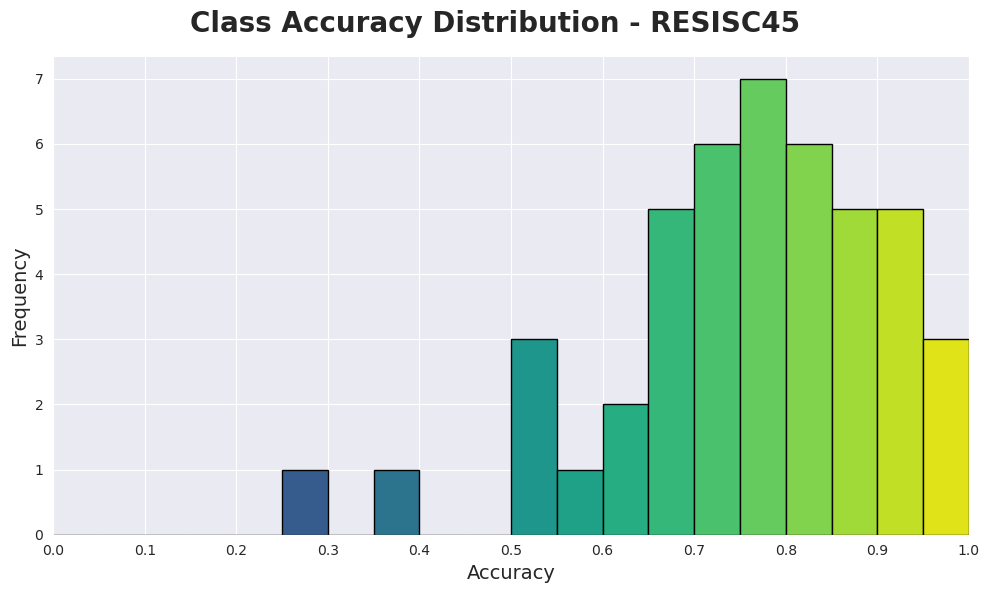

In [219]:
plot_per_class_accuracies(
    resisc45_per_class_acc,
    'RESISC45',
    num_bins=20
)

#### Food-101

In [220]:
swin_food101_16 = Backbone(model_names['Swin'], num_classes=len(food101_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([101]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([101, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [221]:
get_model_params(swin_food101_16)

Parameters: 86.85M


In [222]:
food101_loss, food101_acc, food101_per_class_acc = train_model(
    swin_food101_16,
    food101_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=16
)

/opt/conda/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 202/202 [00:25<00:00,  8.00it/s]


Epochs: 1/10 | train_loss: 2.9003 | train_acc: 0.4115


100%|██████████| 202/202 [00:24<00:00,  8.14it/s]


Epochs: 2/10 | train_loss: 0.9288 | train_acc: 0.8168


100%|██████████| 202/202 [00:24<00:00,  8.12it/s]


Epochs: 3/10 | train_loss: 0.5004 | train_acc: 0.9121


100%|██████████| 202/202 [00:24<00:00,  8.12it/s]


Epochs: 4/10 | train_loss: 0.3417 | train_acc: 0.9455


100%|██████████| 202/202 [00:24<00:00,  8.13it/s]


Epochs: 5/10 | train_loss: 0.2179 | train_acc: 0.9740


100%|██████████| 202/202 [00:25<00:00,  8.04it/s]


Epochs: 6/10 | train_loss: 0.1612 | train_acc: 0.9827


100%|██████████| 202/202 [00:24<00:00,  8.14it/s]


Epochs: 7/10 | train_loss: 0.1255 | train_acc: 0.9870


100%|██████████| 202/202 [00:24<00:00,  8.15it/s]


Epochs: 8/10 | train_loss: 0.1105 | train_acc: 0.9901


100%|██████████| 202/202 [00:24<00:00,  8.13it/s]


Epochs: 9/10 | train_loss: 0.0869 | train_acc: 0.9926


100%|██████████| 202/202 [00:24<00:00,  8.14it/s]

Epochs: 10/10 | train_loss: 0.0687 | train_acc: 0.9963


In [223]:
food101_loss, food101_acc, food101_per_class_acc = evaluate_model(
    swin_food101_16,
    food101_validation,
    config
)

100%|██████████| 3157/3157 [06:24<00:00,  8.22it/s]


test_loss: 0.7450 | test_acc: 0.7888


In [224]:
food101_accs.append(food101_acc)

In [225]:
get_top_5_accuracies(food101_per_class_acc)

[('spaghetti carbonara', 0.988),
 ('edamame', 0.98),
 ('hot and sour soup', 0.964),
 ('fish and chips', 0.96),
 ('oysters', 0.96)]

In [226]:
get_bottom_5_accuracies(food101_per_class_acc)

[('filet mignon', 0.368),
 ('pork chop', 0.444),
 ('ravioli', 0.468),
 ('foie gras', 0.48),
 ('steak', 0.484)]

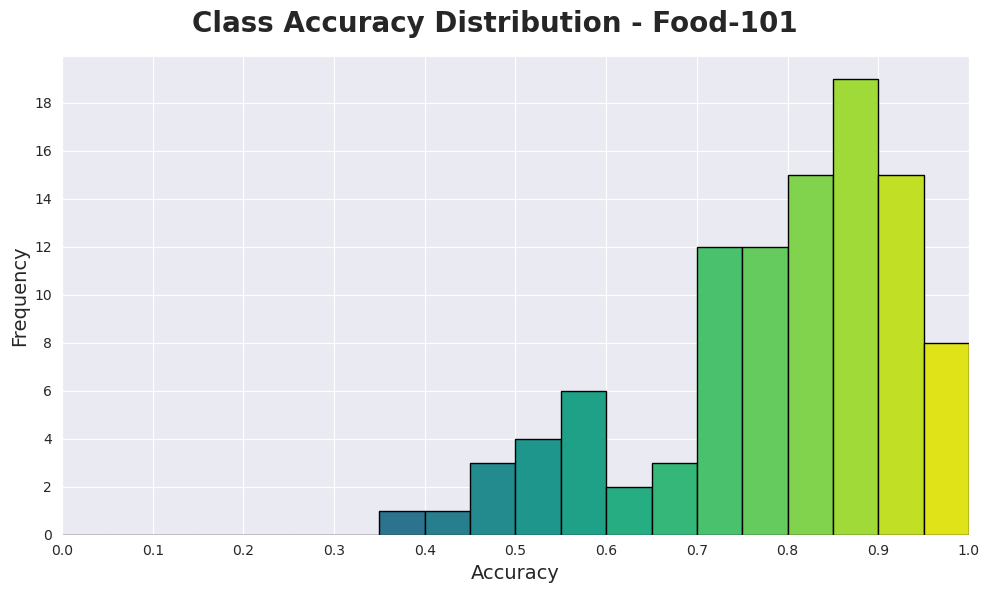

In [227]:
plot_per_class_accuracies(
    food101_per_class_acc,
    'Food-101',
    num_bins=20
)

#### FER2013

In [228]:
swin_fer2013_16 = Backbone(model_names['Swin'], num_classes=len(fer2013_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([7]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([7, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [229]:
get_model_params(swin_fer2013_16)

Parameters: 86.75M


In [230]:
fer2013_loss, fer2013_acc, fer2013_per_class_acc = train_model(
    swin_fer2013_16,
    fer2013_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=16
)

100%|██████████| 14/14 [00:01<00:00, 10.15it/s]


Epochs: 1/10 | train_loss: 2.0377 | train_acc: 0.1518


100%|██████████| 14/14 [00:01<00:00, 10.17it/s]


Epochs: 2/10 | train_loss: 1.5595 | train_acc: 0.4732


100%|██████████| 14/14 [00:01<00:00, 10.15it/s]


Epochs: 3/10 | train_loss: 1.3026 | train_acc: 0.6161


100%|██████████| 14/14 [00:01<00:00, 10.21it/s]


Epochs: 4/10 | train_loss: 1.1069 | train_acc: 0.6607


100%|██████████| 14/14 [00:01<00:00, 10.06it/s]


Epochs: 5/10 | train_loss: 1.0024 | train_acc: 0.7232


100%|██████████| 14/14 [00:01<00:00, 10.13it/s]


Epochs: 6/10 | train_loss: 0.8848 | train_acc: 0.7589


100%|██████████| 14/14 [00:01<00:00, 10.19it/s]


Epochs: 7/10 | train_loss: 0.8101 | train_acc: 0.8036


100%|██████████| 14/14 [00:01<00:00, 10.22it/s]


Epochs: 8/10 | train_loss: 0.7149 | train_acc: 0.8571


100%|██████████| 14/14 [00:01<00:00, 10.22it/s]


Epochs: 9/10 | train_loss: 0.6525 | train_acc: 0.8929


100%|██████████| 14/14 [00:01<00:00, 10.16it/s]

Epochs: 10/10 | train_loss: 0.6446 | train_acc: 0.8750


In [231]:
fer2013_loss, fer2013_acc, fer2013_per_class_acc = evaluate_model(
    swin_fer2013_16,
    fer2013_test,
    config
)

100%|██████████| 449/449 [00:43<00:00, 10.30it/s]

test_loss: 1.6300 | test_acc: 0.4372


In [232]:
fer2013_accs.append(fer2013_acc)

In [233]:
fer2013_per_class_acc

{'angry': 0.3727087576374745,
 'disgust': 0.38181818181818183,
 'fear': 0.2689393939393939,
 'happy': 0.6757679180887372,
 'sad': 0.27946127946127947,
 'surprise': 0.38221153846153844,
 'neutral': 0.48562300319488816}

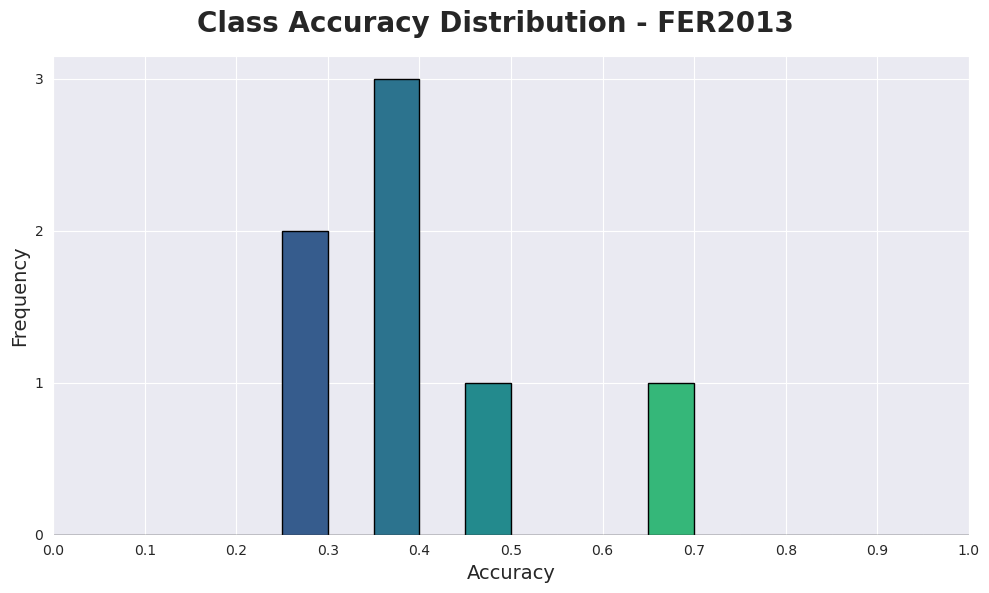

In [234]:
plot_per_class_accuracies(
    fer2013_per_class_acc,
    'FER2013',
    num_bins=20
)

#### PCam

In [235]:
swin_pcam_16 = Backbone(model_names['Swin'], num_classes=len(pcam_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([2, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [236]:
get_model_params(swin_pcam_16)

Parameters: 86.75M


In [237]:
pcam_loss, pcam_acc, pcam_per_class_acc = train_model(
    swin_pcam_16,
    pcam_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=16
)

100%|██████████| 4/4 [00:00<00:00,  9.97it/s]


Epochs: 1/10 | train_loss: 0.7378 | train_acc: 0.5312


100%|██████████| 4/4 [00:00<00:00, 10.13it/s]


Epochs: 2/10 | train_loss: 0.6143 | train_acc: 0.6562


100%|██████████| 4/4 [00:00<00:00, 10.11it/s]


Epochs: 3/10 | train_loss: 0.5531 | train_acc: 0.8125


100%|██████████| 4/4 [00:00<00:00, 10.11it/s]


Epochs: 4/10 | train_loss: 0.4722 | train_acc: 0.7188


100%|██████████| 4/4 [00:00<00:00, 10.10it/s]


Epochs: 5/10 | train_loss: 0.4438 | train_acc: 0.7812


100%|██████████| 4/4 [00:00<00:00, 10.06it/s]


Epochs: 6/10 | train_loss: 0.3966 | train_acc: 0.8750


100%|██████████| 4/4 [00:00<00:00, 10.05it/s]


Epochs: 7/10 | train_loss: 0.3847 | train_acc: 0.9375


100%|██████████| 4/4 [00:00<00:00, 10.07it/s]


Epochs: 8/10 | train_loss: 0.3369 | train_acc: 0.9062


100%|██████████| 4/4 [00:00<00:00, 10.08it/s]


Epochs: 9/10 | train_loss: 0.3216 | train_acc: 0.8750


100%|██████████| 4/4 [00:00<00:00,  9.91it/s]

Epochs: 10/10 | train_loss: 0.2983 | train_acc: 0.8750


In [238]:
pcam_loss, pcam_acc, pcam_per_class_acc = evaluate_model(
    swin_pcam_16,
    pcam_test,
    config
)

100%|██████████| 4096/4096 [06:41<00:00, 10.20it/s]

test_loss: 0.5082 | test_acc: 0.7621


In [239]:
pcam_accs.append(pcam_acc)

In [240]:
pcam_per_class_acc

{'healthy lymph node tissue': 0.6668293575742785,
 'lymph node tumor tissue': 0.8574830555046712}

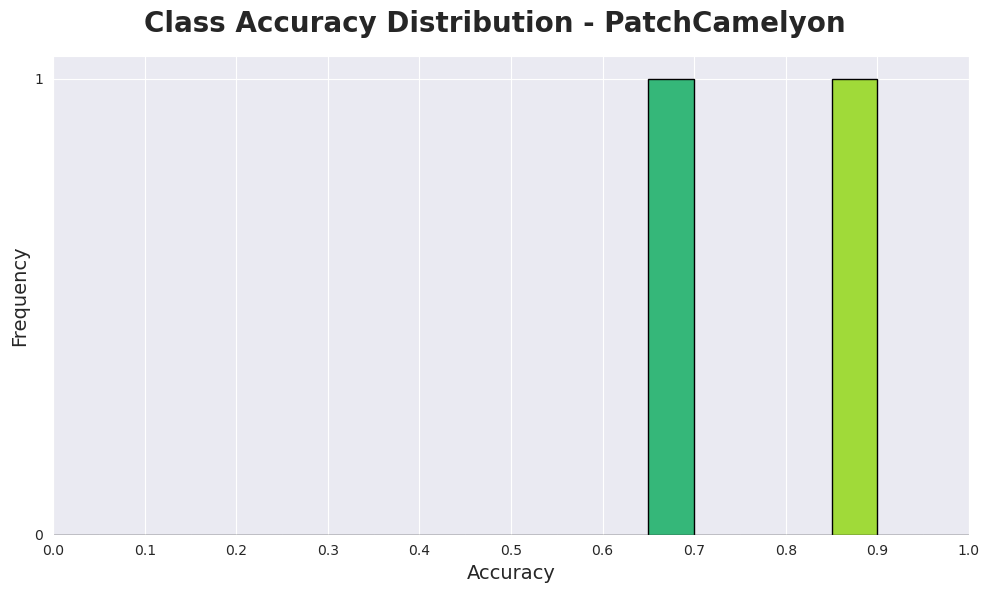

In [241]:
plot_per_class_accuracies(
    pcam_per_class_acc,
    'PatchCamelyon',
    num_bins=20
)

#### SUN397

In [242]:
swin_sun397_16 = Backbone(model_names['Swin'], num_classes=len(sun397_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([397]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([397, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [243]:
get_model_params(swin_sun397_16)

Parameters: 87.15M


In [244]:
sun397_loss, sun397_acc, sun397_per_class_acc = train_model(
    swin_sun397_16,
    sun397_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=16
)

100%|██████████| 794/794 [01:40<00:00,  7.90it/s]


Epochs: 1/10 | train_loss: 2.5927 | train_acc: 0.4910


100%|██████████| 794/794 [01:39<00:00,  8.02it/s]


Epochs: 2/10 | train_loss: 0.5708 | train_acc: 0.8419


100%|██████████| 794/794 [01:38<00:00,  8.04it/s]


Epochs: 3/10 | train_loss: 0.2678 | train_acc: 0.9314


100%|██████████| 794/794 [01:39<00:00,  7.99it/s]


Epochs: 4/10 | train_loss: 0.1534 | train_acc: 0.9632


100%|██████████| 794/794 [01:39<00:00,  8.00it/s]


Epochs: 5/10 | train_loss: 0.1005 | train_acc: 0.9800


100%|██████████| 794/794 [01:39<00:00,  8.02it/s]


Epochs: 6/10 | train_loss: 0.0787 | train_acc: 0.9821


100%|██████████| 794/794 [01:39<00:00,  8.01it/s]


Epochs: 7/10 | train_loss: 0.0665 | train_acc: 0.9855


100%|██████████| 794/794 [01:39<00:00,  8.01it/s]


Epochs: 8/10 | train_loss: 0.0544 | train_acc: 0.9888


100%|██████████| 794/794 [01:38<00:00,  8.02it/s]


Epochs: 9/10 | train_loss: 0.0433 | train_acc: 0.9901


100%|██████████| 794/794 [01:39<00:00,  8.01it/s]


Epochs: 10/10 | train_loss: 0.0385 | train_acc: 0.9906


In [245]:
sun397_loss, sun397_acc, sun397_per_class_acc = evaluate_model(
    swin_sun397_16,
    sun397_test,
    config
)

100%|██████████| 2719/2719 [05:38<00:00,  8.03it/s]


test_loss: 1.4139 | test_acc: 0.6915


In [246]:
sun397_accs.append(sun397_acc)

In [247]:
get_top_5_accuracies(sun397_per_class_acc)

[('electrical substation', 1.0),
 ('greenhouse (outdoor)', 1.0),
 ('planetarium (outdoor)', 1.0),
 ('podium (outdoor)', 1.0),
 ('skatepark', 1.0)]

In [248]:
get_bottom_5_accuracies(sun397_per_class_acc)

[('library (outdoor)', 0.09523809523809523),
 ('monastery (outdoor)', 0.1724137931034483),
 ('house', 0.18840579710144928),
 ('ski lodge', 0.2),
 ('gift shop', 0.21428571428571427)]

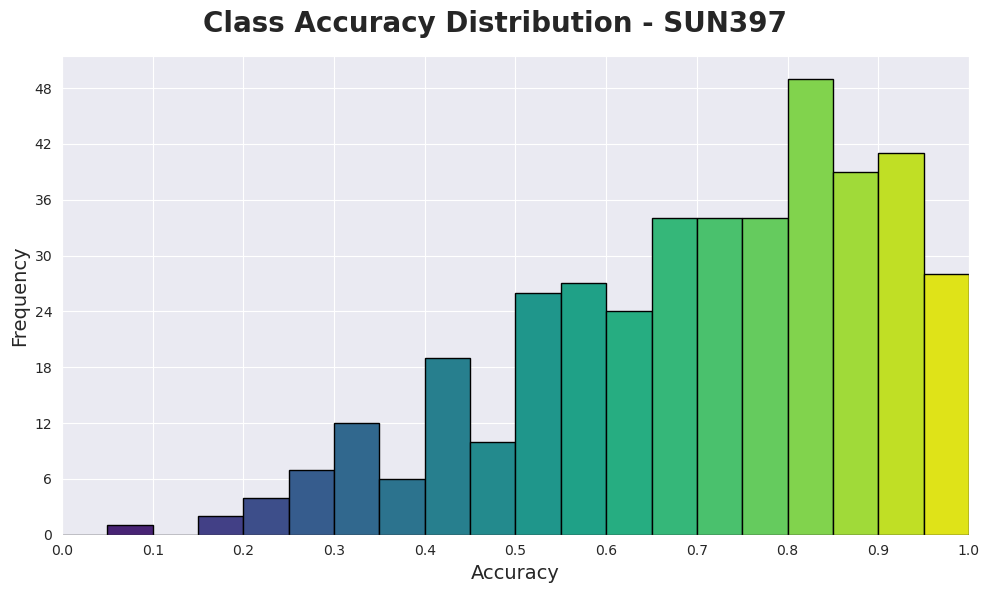

In [249]:
plot_per_class_accuracies(
    sun397_per_class_acc,
    'SUN397',
    num_bins=20
)

#### DTD

In [250]:
swin_dtd_16 = Backbone(model_names['Swin'], num_classes=len(dtd_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([47]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([47, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [251]:
get_model_params(swin_dtd_16)

Parameters: 86.79M


In [252]:
dtd_loss, dtd_acc, dtd_per_class_acc = train_model(
    swin_dtd_16,
    dtd_train,
    config,
    'Swin',
    use_val=False,
    fine_tune=False,
    few_shot=16
)

100%|██████████| 94/94 [00:12<00:00,  7.46it/s]


Epochs: 1/10 | train_loss: 2.7540 | train_acc: 0.4082


100%|██████████| 94/94 [00:12<00:00,  7.73it/s]


Epochs: 2/10 | train_loss: 0.9932 | train_acc: 0.8431


100%|██████████| 94/94 [00:12<00:00,  7.74it/s]


Epochs: 3/10 | train_loss: 0.5413 | train_acc: 0.9136


100%|██████████| 94/94 [00:12<00:00,  7.72it/s]


Epochs: 4/10 | train_loss: 0.3294 | train_acc: 0.9521


100%|██████████| 94/94 [00:12<00:00,  7.74it/s]


Epochs: 5/10 | train_loss: 0.2287 | train_acc: 0.9734


100%|██████████| 94/94 [00:12<00:00,  7.74it/s]


Epochs: 6/10 | train_loss: 0.1640 | train_acc: 0.9880


100%|██████████| 94/94 [00:12<00:00,  7.73it/s]


Epochs: 7/10 | train_loss: 0.1336 | train_acc: 0.9894


100%|██████████| 94/94 [00:12<00:00,  7.77it/s]


Epochs: 8/10 | train_loss: 0.1218 | train_acc: 0.9880


100%|██████████| 94/94 [00:12<00:00,  7.72it/s]


Epochs: 9/10 | train_loss: 0.0907 | train_acc: 0.9920


100%|██████████| 94/94 [00:12<00:00,  7.73it/s]

Epochs: 10/10 | train_loss: 0.0812 | train_acc: 0.9920


In [253]:
dtd_loss, dtd_acc, dtd_per_class_acc = evaluate_model(
    swin_dtd_16,
    dtd_test,
    config
)

100%|██████████| 235/235 [00:28<00:00,  8.26it/s]

test_loss: 1.2949 | test_acc: 0.6516


In [254]:
dtd_accs.append(dtd_acc)

In [255]:
get_top_5_accuracies(dtd_per_class_acc)

[('crystalline', 0.95),
 ('bubbly', 0.925),
 ('cobwebbed', 0.925),
 ('potholed', 0.925),
 ('scaly', 0.925)]

In [256]:
get_bottom_5_accuracies(dtd_per_class_acc)

[('woven', 0.175),
 ('blotchy', 0.2),
 ('bumpy', 0.35),
 ('swirly', 0.35),
 ('lined', 0.375)]

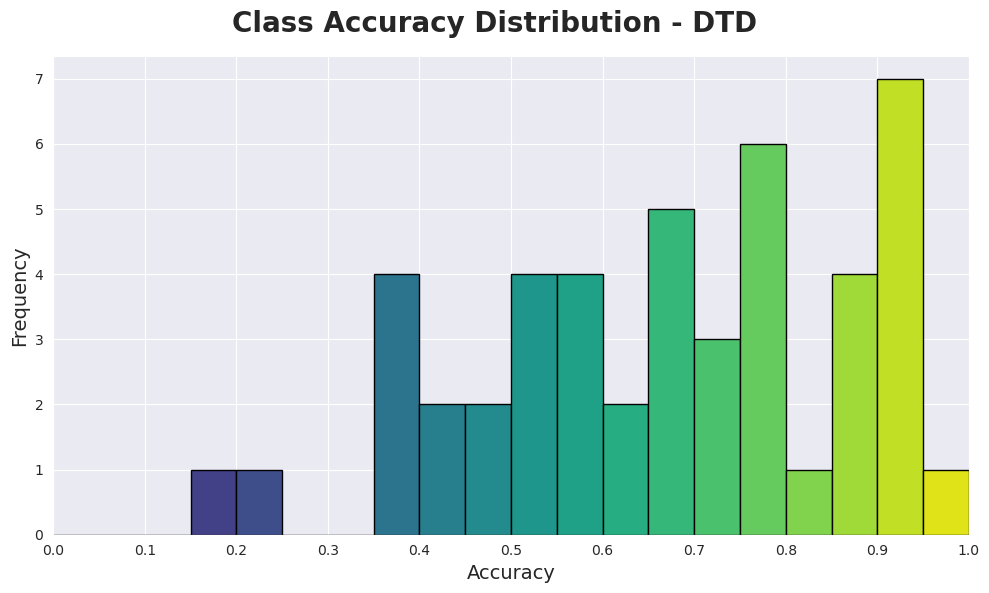

In [257]:
plot_per_class_accuracies(
    dtd_per_class_acc,
    'DTD',
    num_bins=20
)

### Results

Display the results of the analysis in dataframe.

In [258]:
results = [
    resisc45_accs,
    food101_accs,
    fer2013_accs,
    pcam_accs,
    sun397_accs,
    dtd_accs,
]

In [260]:
labels = ['RESISC45', 'Food-101', 'FER2013', 'PatchChamelyon', 'SUN397', 'DTD']
n_shots = [1, 2, 4, 8, 16]

In [261]:
acc_dict = create_accuracy_dict(
    results,
    labels
)

In [262]:
df = pd.DataFrame(results, columns=[f"{n}-shot linear probe" for n in n_shots], index=labels)
df

,1-shot linear probe,2-shot linear probe,4-shot linear probe,8-shot linear probe,16-shot linear probe
RESISC45,0.339683,0.481746,0.632063,0.711111,0.761270
Food-101,0.396554,0.544277,0.668792,0.751485,0.788792
FER2013,0.276400,0.250209,0.317359,0.363054,0.437169
PatchChamelyon,0.466797,0.484222,0.426880,0.749481,0.762115
SUN397,0.406805,0.529655,0.622989,0.671356,0.691494
DTD,0.373404,0.467553,0.522340,0.589362,0.651596
